In [140]:
# IMPORTAÇÕES BÁSICAS
# Importação de bibliotecas essenciais para análise de dados e visualização

import sys
from pathlib import Path

# Adicionar pasta raiz ao path para importar módulos customizados
sys.path.append('../../..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px        
import plotly.graph_objects as go  
import altair as alt               
from datetime import datetime

print("✅ Bibliotecas básicas importadas!")

✅ Bibliotecas básicas importadas!


In [141]:
# IMPORTAÇÃO DOS MÓDULOS CUSTOMIZADOS
# Importa funções personalizadas do projeto

from lib.carregamento import (
    carregar_base_silver,
    carregar_base_gold_sp,
    carregar_base_agibank,
    carregar_base_setorial,
    carregar_base_filtrada,
    listar_arquivos_disponiveis,
    info_base
)

from lib.cores import (
    aplicar_tema_agibank,
    configurar_plotly,
    CORES_AGIBANK,
    PALETA_CATEGORICA,
    PALETA_AZUL,
    PALETA_VERDE,
    PLOTLY_COLORS,
    PLOTLY_PALETTE,
    PLOTLY_SCALE_AZUL,
    PLOTLY_SCALE_VERDE
)

from lib.visualizacoes import (
    grafico_barras,
    grafico_linha,
    grafico_pizza,
    grafico_boxplot,
    grafico_heatmap,
    grafico_distribuicao,
    grafico_comparativo_barras
)

print("✅ Módulos customizados importados!")

✅ Módulos customizados importados!


In [142]:
# CONFIGURAÇÕES GERAIS
# Define configurações de warnings, reprodutibilidade e exibição de dados

warnings.filterwarnings('ignore')
np.random.seed(42)

np.set_printoptions(
    precision=2,
    suppress=True,
    linewidth=120,
    edgeitems=5,
    threshold=1000
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
pd.set_option('mode.use_inf_as_na', True)

print("✅ Configurações gerais aplicadas!")

✅ Configurações gerais aplicadas!


In [143]:
# CONFIGURAÇÕES VISUAIS
# Aplica temas e configurações para gráficos

aplicar_tema_agibank('grande')
configurar_plotly()

alt.renderers.enable('default')
alt.data_transformers.disable_max_rows()

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except:
    pass

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

print("✅ Temas visuais aplicados!")

Tema Agibank aplicado - Tamanho: grande
Tema Agibank aplicado ao Plotly
✅ Temas visuais aplicados!


In [144]:
# DEFINIÇÃO DE CONSTANTES E CAMINHOS
# Define ano de análise, janelas temporais e caminhos do projeto

ANO_ANALISE = np.int16(2025)
JANELA_ANOS = np.array([ANO_ANALISE - 1, ANO_ANALISE], dtype=np.int16)
DATAS_REFERENCIA = np.arange(f'{ANO_ANALISE}-01', f'{ANO_ANALISE+1}-01', dtype='datetime64[M]')

RAIZ_PROJETO = Path.cwd()
CAMINHO_OUTPUT = RAIZ_PROJETO / 'output'
CAMINHO_OUTPUT.mkdir(exist_ok=True)

print(f"✅ Constantes definidas!")
print(f"Ano de análise: {ANO_ANALISE}")
print(f"Pasta de output: {CAMINHO_OUTPUT}")

✅ Constantes definidas!
Ano de análise: 2025
Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\output


In [145]:
# RESUMO DO AMBIENTE
# Exibe informações sobre versões das bibliotecas e configurações aplicadas

print("=" * 80)
print("AMBIENTE CONFIGURADO COM SUCESSO")
print("=" * 80)

try:
    plotly_v = plotly.__version__
except:
    plotly_v = "Instalado"

info_libs = np.array([
    ['Pandas', pd.__version__],
    ['NumPy', np.__version__],
    ['Matplotlib', plt.matplotlib.__version__],
    ['Seaborn', sns.__version__],
    ['Plotly', plotly_v],
    ['Altair', alt.__version__],
    ['Python', sys.version.split()[0]]
])

print(f"\nVersões das bibliotecas:")
for lib, versao in info_libs:
    print(f"  {lib}: {versao}")

print(f"\nConfigurações do projeto:")
print(f"  Ano de análise: {ANO_ANALISE}")
print(f"  Pasta de output: {CAMINHO_OUTPUT}")
print(f"  Path atual: {RAIZ_PROJETO}")

paleta_mpl_np = np.array(PALETA_CATEGORICA)
paleta_plotly_np = np.array(PLOTLY_PALETTE)

print(f"\nTema visual:")
print(f"  Tema Agibank aplicado (tamanho: grande)")
print(f"  Paleta Matplotlib: {paleta_mpl_np.size} cores")
print(f"  Paleta Plotly: {paleta_plotly_np.size} cores")

print("=" * 80)

AMBIENTE CONFIGURADO COM SUCESSO

Versões das bibliotecas:
  Pandas: 2.3.3
  NumPy: 2.3.5
  Matplotlib: 3.10.7
  Seaborn: 0.13.2
  Plotly: Instalado
  Altair: 6.0.0
  Python: 3.13.5

Configurações do projeto:
  Ano de análise: 2025
  Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\output
  Path atual: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver

Tema visual:
  Tema Agibank aplicado (tamanho: grande)
  Paleta Matplotlib: 6 cores
  Paleta Plotly: 6 cores


In [146]:
# CARREGAMENTO DAS BASES DE DADOS
# Carrega bases setorial e SP completo

print("=" * 80)
print("CARREGANDO BASES DE DADOS")
print("=" * 80 + "\n")

print("Carregando base setorial...")
df_setorial = carregar_base_setorial()

print("\nCarregando base SP completo...")
df_sp_completo = carregar_base_gold_sp()

print("\n✅ Bases carregadas com sucesso!")

CARREGANDO BASES DE DADOS

Carregando base setorial...
Carregando base setorial de: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\..\..\..\data\gold\sp_setorial_segments_v1.csv
Base setorial carregada com sucesso!
Registros: 45
Colunas: 3

Carregando base SP completo...
Carregando SP (Gold) de: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\..\..\..\data\gold\sp_consumidor_completo_v1.csv
Separador detectado: ';'
Tentativa 1...
✅ Base SP carregada com sucesso (tentativa 1)!
Registros: 649,557
Colunas: 32

✅ Bases carregadas com sucesso!


In [147]:
# ATUALIZAÇÃO DE ARRAYS E VARIÁVEIS GLOBAIS
print("=" * 80)
print("ATUALIZANDO ARRAYS E VARIÁVEIS")
print("=" * 80)

# Recria todos os arrays a partir da base filtrada
arr_cidade = df_sp_financeiro['cidade'].str.upper().to_numpy()
arr_nota = df_sp_financeiro['nota_do_consumidor'].to_numpy()
arr_tempo = df_sp_financeiro['tempo_resposta'].to_numpy()
arr_mes = df_sp_financeiro['mes_abertura'].to_numpy()
arr_avaliacao = df_sp_financeiro['avaliacao_reclamacao'].to_numpy()
arr_sexo = df_sp_financeiro['sexo'].to_numpy()
arr_faixa_etaria = df_sp_financeiro['faixa_etaria'].to_numpy()
arr_instituicao = df_sp_financeiro['nome_fantasia'].to_numpy()

# Atualiza flags geográficas
eh_capital = arr_cidade == 'SÃO PAULO'
eh_interior = ~eh_capital
eh_campinas = arr_cidade == 'CAMPINAS'

df_sp_financeiro['eh_capital'] = eh_capital
df_sp_financeiro['eh_interior'] = eh_interior
df_sp_financeiro['eh_campinas'] = eh_campinas

# Atualiza variáveis globais
total_registros = len(df_sp_financeiro)
total_capital = np.sum(eh_capital)
total_interior = np.sum(eh_interior)
total_campinas = np.sum(eh_campinas)

pct_capital = (total_capital / total_registros) * 100
pct_interior = (total_interior / total_registros) * 100
pct_campinas = (total_campinas / total_registros) * 100

print(f"\n✅ Arrays e variáveis atualizados!")
print(f"\nDISTRIBUIÇÃO ATUALIZADA:")
print(f"  Total SP: {total_registros:,}")
print(f"  Capital: {total_capital:,} ({pct_capital:.1f}%)")
print(f"  Interior: {total_interior:,} ({pct_interior:.1f}%)")
print(f"  Campinas: {total_campinas:,} ({pct_campinas:.1f}%)")

# Recategoriza notas e tempo
categoria_nota = np.select(
    [arr_nota <= 2, arr_nota == 3, arr_nota >= 4],
    ['Insatisfeito (≤2)', 'Neutro (3)', 'Satisfeito (≥4)'],
    default='Sem nota'
)
df_sp_financeiro['categoria_nota'] = categoria_nota

categoria_tempo = np.select(
    [
        arr_tempo <= 1,
        (arr_tempo > 1) & (arr_tempo <= 3),
        (arr_tempo > 3) & (arr_tempo <= 7),
        (arr_tempo > 7) & (arr_tempo <= 10),
        arr_tempo > 10
    ],
    ['0-1 dia', '1-3 dias', '3-7 dias', '7-10 dias', '>10 dias'],
    default='Não informado'
)
df_sp_financeiro['categoria_tempo'] = categoria_tempo

no_prazo = arr_tempo <= 10
df_sp_financeiro['no_prazo'] = no_prazo

print(f"\n✅ Categorizações aplicadas!")

ATUALIZANDO ARRAYS E VARIÁVEIS

✅ Arrays e variáveis atualizados!

DISTRIBUIÇÃO ATUALIZADA:
  Total SP: 268,635
  Capital: 82,063 (30.5%)
  Interior: 186,572 (69.5%)
  Campinas: 7,361 (2.7%)

✅ Categorizações aplicadas!


In [148]:
# FILTRO: SETOR FINANCEIRO
print("=" * 80)
print("APLICANDO FILTRO: SETOR FINANCEIRO")
print("=" * 80)

# Define segmentos financeiros relevantes
segmentos_financeiros = [
    'Bancos, Financeiras e Administradoras de Cartão',
    'Empresas de Pagamento Eletrônico',
    'Seguros, Capitalização e Previdência',
    'Administradoras de Consórcios',
    'Corretoras e Distribuidoras de Títulos e Investimentos'
]

# Aplica filtro por segmento
mask_financeiro = df_sp_completo['segmento_de_mercado'].isin(segmentos_financeiros)
df_sp_financeiro = df_sp_completo[mask_financeiro].copy()

# Define assuntos financeiros válidos (CORE BANCÁRIO - produtos que Agibank oferece ou compete)
assuntos_financeiros_validos = [
    'Atendimento Bancário',
    'Caixa Eletrônico Multibanco',
    'Cartão de Crédito / Cartão de Débito / Cartão de Loja',
    'Cartão de Programas Sociais',
    'Cadastro Positivo',
    'Consulta / Monitoramento de CPF',
    'Consórcio de Imóveis',
    'Consórcios (exceto imóveis)',
    'Conta corrente / Salário / Poupança /Conta Aposentadoria',
    'Crédito Consignado (para servidores públicos ou trabalhadores do setor privado)',
    'Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)',
    'Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos)',
    'Investimentos / Aplicações / Câmbio / Previdência Privada',
    'Operações de Crédito (Cheque Especial, CDC, Crédito Direto ao Consumidor)',
    'Outros Seguros (Viagem, Portáteis, Transporte, Responsabilidade Civil, Educacional, Fiança, Funeral, Garantia Estendida, Bike, Pet)',
    'Planos de Previdência Privada Aberta (PGBL, VGBL)',
    'Seguro de Acidentes Pessoais',
    'Seguro de Vida',
    'Seguro Desemprego / Perda de Renda',
    'Seguro Prestamista',
    'Serviço de pagamento online (Mercado Pago, PicPay, PayPal, PagSeguro, Google Pay, Samsung Pay, Apple Pay)',
    'Título de Capitalização',
    'Outros Produtos e Serviços Financeiros'
]

# Aplica segundo filtro: apenas assuntos financeiros CORE
mask_assuntos_financeiros = df_sp_financeiro['assunto'].isin(assuntos_financeiros_validos)
df_sp_financeiro = df_sp_financeiro[mask_assuntos_financeiros].copy()

# Estatísticas do filtro
total_original = len(df_sp_completo)
total_financeiro = len(df_sp_financeiro)
total_removido = total_original - total_financeiro

pct_financeiro = (total_financeiro / total_original) * 100
pct_removido = (total_removido / total_original) * 100

print(f"\nRESULTADO DO FILTRO:")
print(f"  Total original (todos os setores): {total_original:,}")
print(f"  Setor Financeiro CORE (mantido): {total_financeiro:,} ({pct_financeiro:.1f}%)")
print(f"  Removido: {total_removido:,} ({pct_removido:.1f}%)")

print(f"\nDISTRIBUIÇÃO POR SEGMENTO FINANCEIRO:")
print("-" * 80)

for segmento in segmentos_financeiros:
    qtd = df_sp_financeiro[df_sp_financeiro['segmento_de_mercado'] == segmento].shape[0]
    if qtd > 0:
        pct_seg = (qtd / total_financeiro) * 100
        print(f"  {segmento}: {qtd:,} ({pct_seg:.1f}%)")

print(f"\nTOTAL DE ASSUNTOS FINANCEIROS ÚNICOS: {df_sp_financeiro['assunto'].nunique()}")

print(f"\n❌ REMOVIDOS (não são core Agibank):")
print(f"  • Cartão de Benefícios (vale-transporte, alimentação, etc)")
print(f"  • Financiamento/Seguro de Veículos e Imóveis")
print(f"  • Crédito Rural")
print(f"  • Produtos não-financeiros")

print("\n✅ Filtro aplicado! Base: df_sp_financeiro (apenas produtos core bancário)")

APLICANDO FILTRO: SETOR FINANCEIRO

RESULTADO DO FILTRO:
  Total original (todos os setores): 649,557
  Setor Financeiro CORE (mantido): 268,217 (41.3%)
  Removido: 381,340 (58.7%)

DISTRIBUIÇÃO POR SEGMENTO FINANCEIRO:
--------------------------------------------------------------------------------
  Bancos, Financeiras e Administradoras de Cartão: 244,277 (91.1%)
  Empresas de Pagamento Eletrônico: 13,892 (5.2%)
  Seguros, Capitalização e Previdência: 8,071 (3.0%)
  Administradoras de Consórcios: 1,402 (0.5%)
  Corretoras e Distribuidoras de Títulos e Investimentos: 575 (0.2%)

TOTAL DE ASSUNTOS FINANCEIROS ÚNICOS: 17

❌ REMOVIDOS (não são core Agibank):
  • Cartão de Benefícios (vale-transporte, alimentação, etc)
  • Financiamento/Seguro de Veículos e Imóveis
  • Crédito Rural
  • Produtos não-financeiros

✅ Filtro aplicado! Base: df_sp_financeiro (apenas produtos core bancário)


In [149]:
# PREPARAÇÃO: ARRAYS E VARIÁVEIS GLOBAIS

print("=" * 80)
print("PREPARANDO DADOS PARA ANÁLISE")
print("=" * 80)

# Arrays principais
arr_cidade = df_sp_financeiro['cidade'].str.upper().to_numpy()
arr_nota = df_sp_financeiro['nota_do_consumidor'].to_numpy()
arr_tempo = df_sp_financeiro['tempo_resposta'].to_numpy()
arr_mes = df_sp_financeiro['mes_abertura'].to_numpy()
arr_avaliacao = df_sp_financeiro['avaliacao_reclamacao'].to_numpy()
arr_sexo = df_sp_financeiro['sexo'].to_numpy()
arr_faixa_etaria = df_sp_financeiro['faixa_etaria'].to_numpy()
arr_instituicao = df_sp_financeiro['nome_fantasia'].to_numpy()

# Flags geográficas
eh_capital = arr_cidade == 'SÃO PAULO'
eh_interior = ~eh_capital
eh_campinas = arr_cidade == 'CAMPINAS'

df_sp_financeiro['eh_capital'] = eh_capital
df_sp_financeiro['eh_interior'] = eh_interior
df_sp_financeiro['eh_campinas'] = eh_campinas

# Categorização de notas
categoria_nota = np.select(
    [arr_nota <= 2, arr_nota == 3, arr_nota >= 4],
    ['Insatisfeito (≤2)', 'Neutro (3)', 'Satisfeito (≥4)'],
    default='Sem nota'
)
df_sp_financeiro['categoria_nota'] = categoria_nota

# Categorização de tempo
categoria_tempo = np.select(
    [
        arr_tempo <= 1,
        (arr_tempo > 1) & (arr_tempo <= 3),
        (arr_tempo > 3) & (arr_tempo <= 7),
        (arr_tempo > 7) & (arr_tempo <= 10),
        arr_tempo > 10
    ],
    ['0-1 dia', '1-3 dias', '3-7 dias', '7-10 dias', '>10 dias'],
    default='Não informado'
)
df_sp_financeiro['categoria_tempo'] = categoria_tempo

# Flag de resposta no prazo
no_prazo = arr_tempo <= 10
df_sp_financeiro['no_prazo'] = no_prazo

# Variáveis globais
total_registros = len(arr_cidade)
total_capital = np.sum(eh_capital)
total_interior = np.sum(eh_interior)
total_campinas = np.sum(eh_campinas)

pct_capital = (total_capital / total_registros) * 100
pct_interior = (total_interior / total_registros) * 100
pct_campinas = (total_campinas / total_registros) * 100

print(f"\n✅ Dados preparados!")
print(f"\nDISTRIBUIÇÃO GEOGRÁFICA:")
print(f"  Total SP (setor financeiro): {total_registros:,}")
print(f"  Capital: {total_capital:,} ({pct_capital:.1f}%)")
print(f"  Interior: {total_interior:,} ({pct_interior:.1f}%)")
print(f"  Campinas: {total_campinas:,} ({pct_campinas:.1f}%)")

PREPARANDO DADOS PARA ANÁLISE

✅ Dados preparados!

DISTRIBUIÇÃO GEOGRÁFICA:
  Total SP (setor financeiro): 268,217
  Capital: 81,910 (30.5%)
  Interior: 186,307 (69.5%)
  Campinas: 7,348 (2.7%)


In [150]:
# PERGUNTA 1: TAMANHO DO MERCADO FINANCEIRO DE SÃO PAULO
# Análise da evolução temporal e volumetria do setor financeiro

print("=" * 80)
print("PERGUNTA 1: TAMANHO DO MERCADO FINANCEIRO DE SÃO PAULO")
print("=" * 80)

# Agrupa reclamações por mês
meses_unicos, contagem_por_mes = np.unique(arr_mes, return_counts=True)

# Ordena cronologicamente
idx_ordenado = np.argsort(meses_unicos)
meses_ordenados = meses_unicos[idx_ordenado]
contagens_ordenadas = contagem_por_mes[idx_ordenado]

# Calcula taxa de crescimento
if len(contagens_ordenadas) > 1:
    crescimento = ((contagens_ordenadas[-1] / contagens_ordenadas[0]) - 1) * 100
else:
    crescimento = 0.0

# Estatísticas
media_mensal = np.mean(contagens_ordenadas)
mediana_mensal = np.median(contagens_ordenadas)
desvio_mensal = np.std(contagens_ordenadas)
mes_max = meses_ordenados[np.argmax(contagens_ordenadas)]
reclamacoes_max = np.max(contagens_ordenadas)
mes_min = meses_ordenados[np.argmin(contagens_ordenadas)]
reclamacoes_min = np.min(contagens_ordenadas)

print(f"\nVOLUMETRIA ESTADO DE SÃO PAULO (SETOR FINANCEIRO):")
print(f"  Total de reclamações: {total_registros:,}")
print(f"  Média mensal: {media_mensal:,.0f}")
print(f"  Mediana mensal: {mediana_mensal:,.0f}")
print(f"  Desvio padrão: {desvio_mensal:,.0f}")
print(f"\n  Mês com MAIS reclamações: {mes_max:.0f} ({reclamacoes_max:,})")
print(f"  Mês com MENOS reclamações: {mes_min:.0f} ({reclamacoes_min:,})")
print(f"  Crescimento no período: {crescimento:+.1f}%")

# Tabela de evolução
df_evolucao = pd.DataFrame({
    'Mês': meses_ordenados.astype(int),
    'Reclamações': contagens_ordenadas,
    'Variação %': np.concatenate([[0], np.diff(contagens_ordenadas) / contagens_ordenadas[:-1] * 100])
}).set_index('Mês')

display(
    df_evolucao.style
    .format({
        'Reclamações': '{:,.0f}',
        'Variação %': '{:+.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Variação %'], vmin=-20, vmax=20)
    .set_caption('Evolução Mensal de Reclamações - Setor Financeiro SP')
)

PERGUNTA 1: TAMANHO DO MERCADO FINANCEIRO DE SÃO PAULO

VOLUMETRIA ESTADO DE SÃO PAULO (SETOR FINANCEIRO):
  Total de reclamações: 268,217
  Média mensal: 22,351
  Mediana mensal: 19,770
  Desvio padrão: 7,612

  Mês com MAIS reclamações: 11 (37,999)
  Mês com MENOS reclamações: 2 (13,290)
  Crescimento no período: -15.4%


,Reclamações,Variação %
Mês,,
1,"16,501",+0.0%
2,"13,290",-19.5%
3,"16,591",+24.8%
4,"16,601",+0.1%
5,"19,309",+16.3%
6,"20,230",+4.8%
7,"23,320",+15.3%
8,"30,168",+29.4%
9,"29,568",-2.0%


GRÁFICO: EVOLUÇÃO TEMPORAL


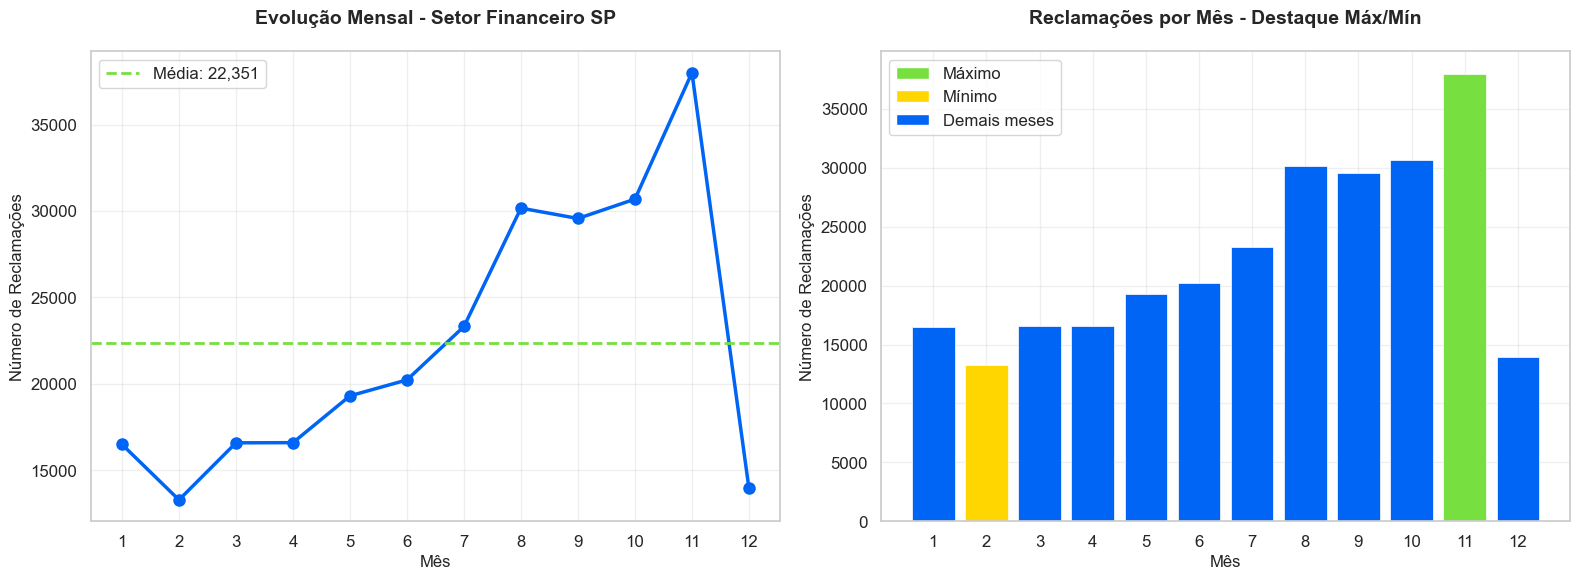

In [151]:
# PERGUNTA 1: VISUALIZAÇÃO DA EVOLUÇÃO TEMPORAL
# Gráficos de linha e barras mostrando a tendência mensal

print("=" * 80)
print("GRÁFICO: EVOLUÇÃO TEMPORAL")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Linha temporal
ax1.plot(meses_ordenados, contagens_ordenadas, 
         marker='o', linewidth=2.5, markersize=8, 
         color=CORES_AGIBANK['azul_principal'])
ax1.axhline(y=media_mensal, color=CORES_AGIBANK['verde'], 
            linestyle='--', linewidth=2, label=f'Média: {media_mensal:,.0f}')
ax1.set_title('Evolução Mensal - Setor Financeiro SP', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Mês', fontsize=12)
ax1.set_ylabel('Número de Reclamações', fontsize=12)
ax1.set_xticks(meses_ordenados)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfico 2: Barras com destaque
cores_barras = [CORES_AGIBANK['verde'] if mes == mes_max 
                else CORES_AGIBANK['amarelo'] if mes == mes_min 
                else CORES_AGIBANK['azul_principal'] 
                for mes in meses_ordenados]

ax2.bar(meses_ordenados, contagens_ordenadas, color=cores_barras, 
        edgecolor='white', linewidth=0.5)
ax2.set_title('Reclamações por Mês - Destaque Máx/Mín', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Mês', fontsize=12)
ax2.set_ylabel('Número de Reclamações', fontsize=12)
ax2.set_xticks(meses_ordenados)
ax2.grid(True, alpha=0.3, axis='y')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=CORES_AGIBANK['verde'], label='Máximo'),
    Patch(facecolor=CORES_AGIBANK['amarelo'], label='Mínimo'),
    Patch(facecolor=CORES_AGIBANK['azul_principal'], label='Demais meses')
]
ax2.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

In [152]:
# PERGUNTA 2: PERFIL DEMOGRÁFICO - GÊNERO
# Análise da distribuição por gênero no setor financeiro paulista

print("=" * 80)
print("PERGUNTA 2: PERFIL DEMOGRÁFICO DO CONSUMIDOR PAULISTA")
print("=" * 80)
print("\nPARTE 1: DISTRIBUIÇÃO POR GÊNERO")
print("-" * 80)

# Trata valores ausentes e conta distribuição
arr_sexo_limpo = pd.Series(arr_sexo).fillna('Não Informado').astype(str).to_numpy()
generos_unicos, contagem_genero = np.unique(arr_sexo_limpo, return_counts=True)

# Ordena do maior para o menor
idx_ord_genero = np.argsort(contagem_genero)[::-1]
generos_ordenados = generos_unicos[idx_ord_genero]
contagens_ordenadas = contagem_genero[idx_ord_genero]
pct_ordenados = (contagens_ordenadas / len(arr_sexo_limpo)) * 100

# Identifica gênero predominante
generos_validos = generos_ordenados[generos_ordenados != 'Não Informado']
if len(generos_validos) > 0:
    genero_predominante = generos_validos[0]
    idx_predominante = np.where(generos_ordenados == genero_predominante)[0][0]
    pct_predominante = pct_ordenados[idx_predominante]

# Tabela
df_genero = pd.DataFrame({
    'Gênero': generos_ordenados,
    'Reclamações': contagens_ordenadas,
    '% do Total': pct_ordenados
}).set_index('Gênero')

display(
    df_genero.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Greens', subset=['% do Total'])
    .set_caption('Distribuição por Gênero - Setor Financeiro SP')
)

print(f"\nINSIGHT:")
print(f"  Gênero predominante: {genero_predominante} ({pct_predominante:.1f}%)")

PERGUNTA 2: PERFIL DEMOGRÁFICO DO CONSUMIDOR PAULISTA

PARTE 1: DISTRIBUIÇÃO POR GÊNERO
--------------------------------------------------------------------------------


,Reclamações,% do Total
Gênero,,
F,"134,691",50.2%
M,"133,341",49.7%
O,181,0.1%
Não Informado,4,0.0%



INSIGHT:
  Gênero predominante: F (50.2%)


In [153]:
# PERGUNTA 2: PERFIL DEMOGRÁFICO - FAIXA ETÁRIA
# Análise da distribuição por idade no setor financeiro paulista

print("\nPARTE 2: DISTRIBUIÇÃO POR FAIXA ETÁRIA")
print("-" * 80)

# Trata valores ausentes e conta distribuição
arr_faixa_limpa = pd.Series(arr_faixa_etaria).fillna('Não Informado').astype(str).to_numpy()
faixas_unicas, contagem_faixas = np.unique(arr_faixa_limpa, return_counts=True)

# Ordena do maior para o menor
idx_ord_faixas = np.argsort(contagem_faixas)[::-1]
faixas_ordenadas = faixas_unicas[idx_ord_faixas]
contagens_faixas_ord = contagem_faixas[idx_ord_faixas]
pct_faixas_ord = (contagens_faixas_ord / len(arr_faixa_limpa)) * 100

# Identifica faixa predominante
faixas_validas = faixas_ordenadas[faixas_ordenadas != 'Não Informado']
if len(faixas_validas) > 0:
    faixa_predominante = faixas_validas[0]
    idx_predominante_faixa = np.where(faixas_ordenadas == faixa_predominante)[0][0]
    pct_predominante_faixa = pct_faixas_ord[idx_predominante_faixa]

# Tabela
df_faixa_etaria = pd.DataFrame({
    'Faixa Etária': faixas_ordenadas,
    'Reclamações': contagens_faixas_ord,
    '% do Total': pct_faixas_ord
}).set_index('Faixa Etária')

display(
    df_faixa_etaria.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Oranges', subset=['% do Total'])
    .set_caption('Distribuição por Faixa Etária - Setor Financeiro SP')
)

print(f"\nINSIGHT:")
print(f"  Faixa etária predominante: {faixa_predominante} ({pct_predominante_faixa:.1f}%)")


PARTE 2: DISTRIBUIÇÃO POR FAIXA ETÁRIA
--------------------------------------------------------------------------------


,Reclamações,% do Total
Faixa Etária,,
entre 31 a 40 anos,"79,678",29.7%
entre 41 a 50 anos,"61,741",23.0%
entre 21 a 30 anos,"59,859",22.3%
entre 51 a 60 anos,"31,868",11.9%
entre 61 a 70 anos,"21,552",8.0%
mais de 70 anos,"9,104",3.4%
até 20 anos,"4,415",1.6%



INSIGHT:
  Faixa etária predominante: entre 31 a 40 anos (29.7%)


GRÁFICO: PERFIL DEMOGRÁFICO


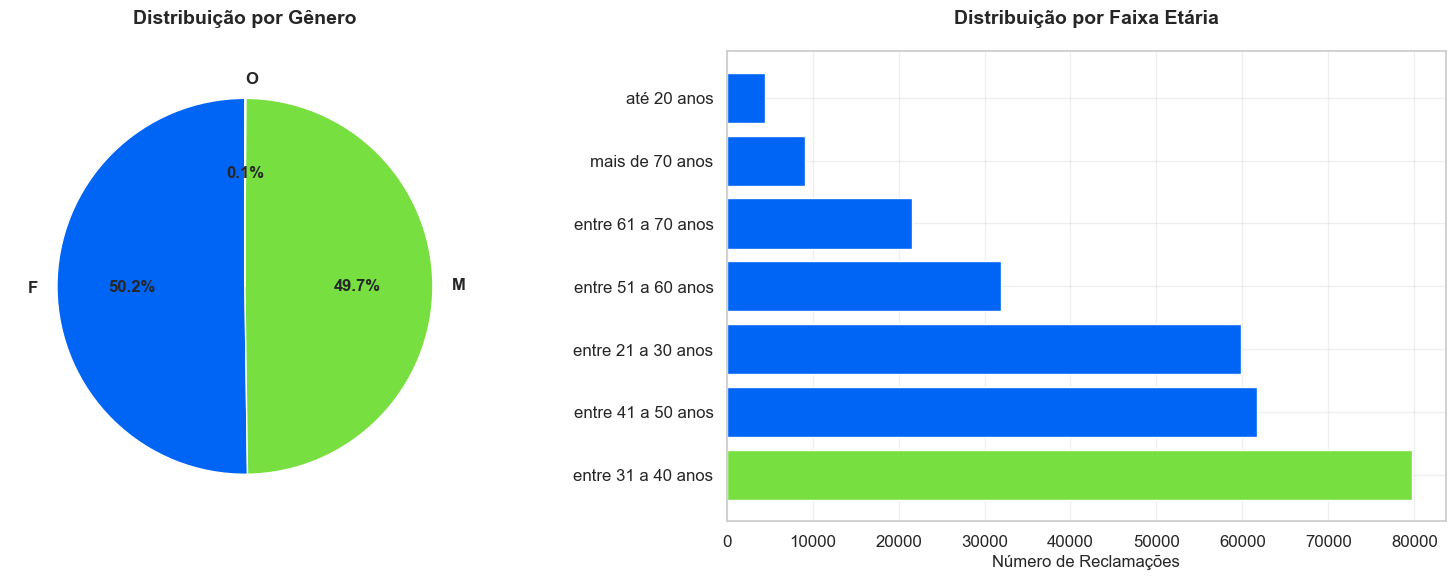

In [154]:
# PERGUNTA 2: VISUALIZAÇÃO GÊNERO E FAIXA ETÁRIA
# Gráficos de distribuição demográfica

print("=" * 80)
print("GRÁFICO: PERFIL DEMOGRÁFICO")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição de Gênero (Pizza)
generos_grafico = generos_ordenados[generos_ordenados != 'Não Informado']
contagens_genero_grafico = contagens_ordenadas[generos_ordenados != 'Não Informado']

cores_pizza = [CORES_AGIBANK['azul_principal'], CORES_AGIBANK['verde'], CORES_AGIBANK['amarelo']]
ax1.pie(contagens_genero_grafico, labels=generos_grafico, autopct='%1.1f%%', 
        colors=cores_pizza[:len(generos_grafico)], startangle=90, 
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Distribuição por Gênero', fontsize=14, fontweight='bold', pad=20)

# Gráfico 2: Distribuição Faixa Etária (Barras)
faixas_grafico = faixas_ordenadas[faixas_ordenadas != 'Não Informado']
contagens_faixas_grafico = contagens_faixas_ord[faixas_ordenadas != 'Não Informado']

cores_barras_faixa = [CORES_AGIBANK['verde'] if i == 0 else CORES_AGIBANK['azul_principal'] 
                      for i in range(len(faixas_grafico))]

ax2.barh(range(len(faixas_grafico)), contagens_faixas_grafico, 
         color=cores_barras_faixa, edgecolor='white', linewidth=1)
ax2.set_yticks(range(len(faixas_grafico)))
ax2.set_yticklabels(faixas_grafico)
ax2.set_xlabel('Número de Reclamações', fontsize=12)
ax2.set_title('Distribuição por Faixa Etária', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [155]:
# PERGUNTA 3: SATISFAÇÃO DO CONSUMIDOR PAULISTA
# Análise do nível de satisfação através das notas atribuídas

print("=" * 80)
print("PERGUNTA 3: SATISFAÇÃO DO CONSUMIDOR PAULISTA")
print("=" * 80)

# Remove valores ausentes para cálculos
arr_nota_valida = arr_nota[~np.isnan(arr_nota)]

# Estatísticas descritivas
nota_media = np.mean(arr_nota_valida)
nota_mediana = np.median(arr_nota_valida)
nota_desvio = np.std(arr_nota_valida)
nota_min = np.min(arr_nota_valida)
nota_max = np.max(arr_nota_valida)

# Distribuição de notas
notas_unicas, contagem_notas = np.unique(arr_nota_valida, return_counts=True)
pct_notas = (contagem_notas / len(arr_nota_valida)) * 100

# Categorias de satisfação
insatisfeitos = np.sum(arr_nota_valida <= 2)
neutros = np.sum(arr_nota_valida == 3)
satisfeitos = np.sum(arr_nota_valida >= 4)

pct_insatisfeitos = (insatisfeitos / len(arr_nota_valida)) * 100
pct_neutros = (neutros / len(arr_nota_valida)) * 100
pct_satisfeitos = (satisfeitos / len(arr_nota_valida)) * 100

# NPS (Net Promoter Score)
promotores = np.sum(arr_nota_valida >= 4)
detratores = np.sum(arr_nota_valida <= 2)
nps = ((promotores - detratores) / len(arr_nota_valida)) * 100

# Taxa de avaliação
total_com_nota = len(arr_nota_valida)
total_sem_nota = np.sum(np.isnan(arr_nota))
taxa_avaliacao = (total_com_nota / len(arr_nota)) * 100

print(f"\nESTATÍSTICAS GERAIS:")
print(f"  Nota média: {nota_media:.2f}")
print(f"  Nota mediana: {nota_mediana:.2f}")
print(f"  Desvio padrão: {nota_desvio:.2f}")
print(f"  Amplitude: {nota_min:.0f} a {nota_max:.0f}")

print(f"\nDISTRIBUIÇÃO POR CATEGORIA:")
print(f"  Insatisfeitos (≤2): {insatisfeitos:,} ({pct_insatisfeitos:.1f}%)")
print(f"  Neutros (=3): {neutros:,} ({pct_neutros:.1f}%)")
print(f"  Satisfeitos (≥4): {satisfeitos:,} ({pct_satisfeitos:.1f}%)")

print(f"\nNPS (NET PROMOTER SCORE):")
print(f"  NPS: {nps:+.1f}")

print(f"\nTAXA DE AVALIAÇÃO:")
print(f"  Com nota: {total_com_nota:,} ({taxa_avaliacao:.1f}%)")
print(f"  Sem nota: {total_sem_nota:,} ({100 - taxa_avaliacao:.1f}%)")

# Tabela detalhada
df_notas = pd.DataFrame({
    'Nota': notas_unicas.astype(int),
    'Quantidade': contagem_notas,
    '% do Total': pct_notas
}).set_index('Nota')

display(
    df_notas.style
    .format({
        'Quantidade': '{:,.0f}',
        '% do Total': '{:.1f}%'
    })
    .background_gradient(cmap='RdYlGn', subset=['% do Total'])
    .set_caption('Distribuição Detalhada das Notas - Setor Financeiro SP')
)

PERGUNTA 3: SATISFAÇÃO DO CONSUMIDOR PAULISTA

ESTATÍSTICAS GERAIS:
  Nota média: 2.19
  Nota mediana: 1.00
  Desvio padrão: 1.60
  Amplitude: 1 a 5

DISTRIBUIÇÃO POR CATEGORIA:
  Insatisfeitos (≤2): 42,698 (65.1%)
  Neutros (=3): 6,587 (10.0%)
  Satisfeitos (≥4): 16,263 (24.8%)

NPS (NET PROMOTER SCORE):
  NPS: -40.3

TAXA DE AVALIAÇÃO:
  Com nota: 65,548 (24.4%)
  Sem nota: 202,669 (75.6%)


,Quantidade,% do Total
Nota,,
1,"38,549",58.8%
2,"4,149",6.3%
3,"6,587",10.0%
4,"4,265",6.5%
5,"11,998",18.3%


GRÁFICO: DISTRIBUIÇÃO DE SATISFAÇÃO


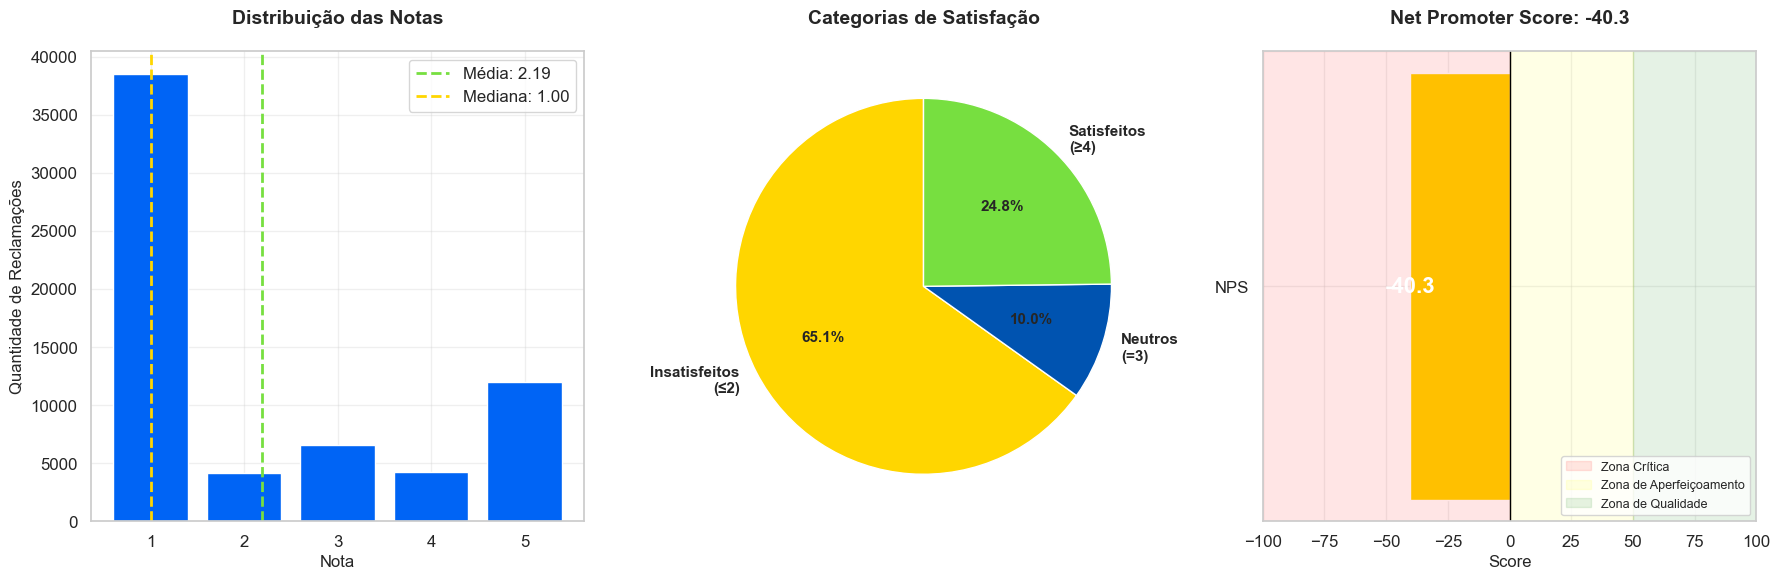

In [156]:
# PERGUNTA 3: VISUALIZAÇÃO DE SATISFAÇÃO
# Gráficos mostrando distribuição de notas e categorias

print("=" * 80)
print("GRÁFICO: DISTRIBUIÇÃO DE SATISFAÇÃO")
print("=" * 80)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Histograma de notas
ax1.bar(notas_unicas, contagem_notas, color=CORES_AGIBANK['azul_principal'], 
        edgecolor='white', linewidth=1)
ax1.axvline(x=nota_media, color=CORES_AGIBANK['verde'], linestyle='--', 
            linewidth=2, label=f'Média: {nota_media:.2f}')
ax1.axvline(x=nota_mediana, color=CORES_AGIBANK['amarelo'], linestyle='--', 
            linewidth=2, label=f'Mediana: {nota_mediana:.2f}')
ax1.set_title('Distribuição das Notas', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Nota', fontsize=12)
ax1.set_ylabel('Quantidade de Reclamações', fontsize=12)
ax1.set_xticks(notas_unicas)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Pizza de categorias
categorias = ['Insatisfeitos\n(≤2)', 'Neutros\n(=3)', 'Satisfeitos\n(≥4)']
valores_cat = [insatisfeitos, neutros, satisfeitos]
cores_cat = [CORES_AGIBANK['amarelo'], CORES_AGIBANK['azul_medio'], CORES_AGIBANK['verde']]

ax2.pie(valores_cat, labels=categorias, autopct='%1.1f%%', colors=cores_cat,
        startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Categorias de Satisfação', fontsize=14, fontweight='bold', pad=20)

# Gráfico 3: NPS visual
ax3.barh(['NPS'], [nps], color=CORES_AGIBANK['verde'] if nps > 0 else CORES_AGIBANK['amarelo'],
         height=0.5)
ax3.axvline(x=0, color='black', linewidth=1)
ax3.set_xlim(-100, 100)
ax3.set_xlabel('Score', fontsize=12)
ax3.set_title(f'Net Promoter Score: {nps:+.1f}', fontsize=14, fontweight='bold', pad=20)
ax3.text(nps, 0, f'{nps:+.1f}', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='white')
ax3.grid(True, alpha=0.3, axis='x')

ax3.axvspan(-100, 0, alpha=0.1, color='red', label='Zona Crítica')
ax3.axvspan(0, 50, alpha=0.1, color='yellow', label='Zona de Aperfeiçoamento')
ax3.axvspan(50, 100, alpha=0.1, color='green', label='Zona de Qualidade')
ax3.legend(loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

In [157]:
# PERGUNTA 4: DISTRIBUIÇÃO GEOGRÁFICA INTERNA DE SÃO PAULO
# Análise das principais cidades do estado em volume de reclamações

print("=" * 80)
print("PERGUNTA 4: DISTRIBUIÇÃO GEOGRÁFICA INTERNA DE SÃO PAULO")
print("=" * 80)

# Conta distribuição por cidade
cidades_unicas, contagem_cidades = np.unique(arr_cidade, return_counts=True)

# Ordena do maior para o menor
idx_ord_cidades = np.argsort(contagem_cidades)[::-1]
cidades_ordenadas = cidades_unicas[idx_ord_cidades]
contagens_ordenadas = contagem_cidades[idx_ord_cidades]

# TOP 20 cidades
top20_cidades = cidades_ordenadas[:20]
top20_contagens = contagens_ordenadas[:20]
pct_top20 = (top20_contagens / total_registros) * 100

# Identifica posições
posicao_campinas = np.where(top20_cidades == 'CAMPINAS')[0][0] + 1 if 'CAMPINAS' in top20_cidades else None

# Concentração geográfica
pct_capital = (total_capital / total_registros) * 100
pct_interior = (total_interior / total_registros) * 100

print(f"\nCONCENTRAÇÃO GEOGRÁFICA:")
print(f"  Capital (São Paulo): {total_capital:,} ({pct_capital:.1f}%)")
print(f"  Interior: {total_interior:,} ({pct_interior:.1f}%)")

if posicao_campinas:
    qtd_campinas = top20_contagens[posicao_campinas - 1]
    pct_campinas_sp = (qtd_campinas / total_registros) * 100
    pct_campinas_interior = (qtd_campinas / total_interior) * 100
    
    print(f"\nDESTAQUE CAMPINAS:")
    print(f"  Posição no ranking: {posicao_campinas}º lugar")
    print(f"  Reclamações: {qtd_campinas:,}")
    print(f"  Representa {pct_campinas_sp:.1f}% de SP")
    print(f"  Representa {pct_campinas_interior:.1f}% do Interior")

# Tabela TOP 20
df_top20_cidades = pd.DataFrame({
    'Posição': np.arange(1, 21),
    'Cidade': top20_cidades,
    'Reclamações': top20_contagens,
    '% de SP': pct_top20,
    'Tipo': ['Capital' if cidade == 'SÃO PAULO' else 'Interior' for cidade in top20_cidades]
}).set_index('Posição')

def estilo_tipo(row):
    if row['Tipo'] == 'Capital':
        return ['', '', '', 'background-color: #90EE90; color: black']
    elif row.name == posicao_campinas:
        return ['', '', '', 'background-color: #FFE4B5; color: black']
    else:
        return ['', '', '', '']

display(
    df_top20_cidades.style
    .format({
        'Reclamações': '{:,.0f}',
        '% de SP': '{:.2f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .apply(estilo_tipo, axis=1)
    .set_caption('TOP 20 Cidades - Setor Financeiro SP')
)

PERGUNTA 4: DISTRIBUIÇÃO GEOGRÁFICA INTERNA DE SÃO PAULO

CONCENTRAÇÃO GEOGRÁFICA:
  Capital (São Paulo): 81,910 (30.5%)
  Interior: 186,307 (69.5%)

DESTAQUE CAMPINAS:
  Posição no ranking: 3º lugar
  Reclamações: 7,348
  Representa 2.7% de SP
  Representa 3.9% do Interior


,Cidade,Reclamações,% de SP,Tipo
Posição,,,,
1,SÃO PAULO,"81,910",30.54%,Capital
2,GUARULHOS,"8,599",3.21%,Interior
3,CAMPINAS,"7,348",2.74%,Interior
4,SOROCABA,"6,100",2.27%,Interior
5,OSASCO,"5,428",2.02%,Interior
6,RIBEIRÃO PRETO,"5,105",1.90%,Interior
7,SÃO BERNARDO DO CAMPO,"4,912",1.83%,Interior
8,SANTO ANDRÉ,"4,767",1.78%,Interior
9,SÃO JOSÉ DOS CAMPOS,"4,760",1.77%,Interior


GRÁFICO: DISTRIBUIÇÃO GEOGRÁFICA


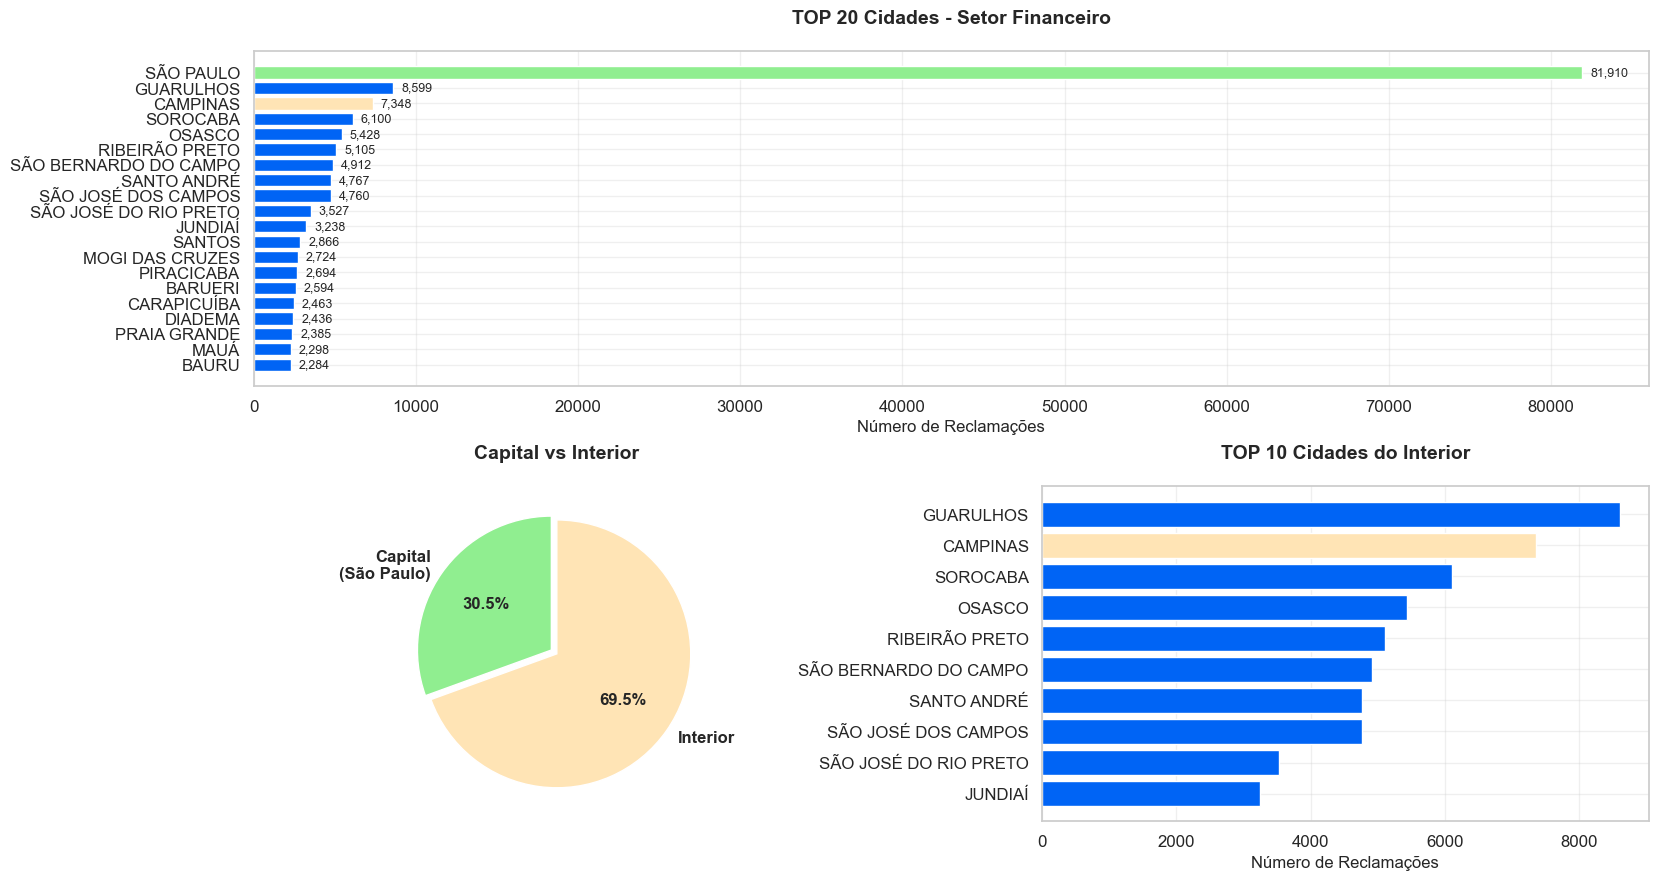

In [158]:
# PERGUNTA 4: VISUALIZAÇÃO DISTRIBUIÇÃO GEOGRÁFICA
# Gráficos mostrando concentração por cidade

print("=" * 80)
print("GRÁFICO: DISTRIBUIÇÃO GEOGRÁFICA")
print("=" * 80)

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Gráfico 1: TOP 20 cidades
cores_ranking = ['#90EE90' if cidade == 'SÃO PAULO' 
                 else '#FFE4B5' if cidade == 'CAMPINAS' 
                 else CORES_AGIBANK['azul_principal'] 
                 for cidade in top20_cidades]

y_pos = np.arange(len(top20_cidades))
ax1.barh(y_pos, top20_contagens, color=cores_ranking, edgecolor='white', linewidth=1)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top20_cidades)
ax1.invert_yaxis()
ax1.set_xlabel('Número de Reclamações', fontsize=12)
ax1.set_title('TOP 20 Cidades - Setor Financeiro', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='x')

for i, (cidade, valor) in enumerate(zip(top20_cidades, top20_contagens)):
    ax1.text(valor + 500, i, f'{valor:,}', va='center', fontsize=9)

# Gráfico 2: Pizza Capital vs Interior
categorias_geo = ['Capital\n(São Paulo)', 'Interior']
valores_geo = [total_capital, total_interior]
cores_geo = ['#90EE90', '#FFE4B5']
explode = (0.05, 0)

ax2.pie(valores_geo, labels=categorias_geo, autopct='%1.1f%%', colors=cores_geo,
        explode=explode, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Capital vs Interior', fontsize=14, fontweight='bold', pad=20)

# Gráfico 3: TOP 10 Interior
top10_interior = top20_cidades[1:11]
top10_interior_valores = top20_contagens[1:11]

ax3.barh(np.arange(len(top10_interior)), top10_interior_valores, 
         color=['#FFE4B5' if cidade == 'CAMPINAS' else CORES_AGIBANK['azul_principal'] 
                for cidade in top10_interior],
         edgecolor='white', linewidth=1)
ax3.set_yticks(np.arange(len(top10_interior)))
ax3.set_yticklabels(top10_interior)
ax3.invert_yaxis()
ax3.set_xlabel('Número de Reclamações', fontsize=12)
ax3.set_title('TOP 10 Cidades do Interior', fontsize=14, fontweight='bold', pad=20)
ax3.grid(True, alpha=0.3, axis='x')

plt.show()

In [159]:
# PERGUNTA 5: COMPARAÇÃO CAPITAL VS INTERIOR
# Análise de diferenças de desempenho entre Capital e Interior

print("=" * 80)
print("PERGUNTA 5: CAPITAL VS INTERIOR")
print("=" * 80)

# Separar dados por região
mask_capital = df_sp_financeiro['eh_capital']
mask_interior = df_sp_financeiro['eh_interior']

# Arrays por região
arr_nota_capital = df_sp_financeiro.loc[mask_capital, 'nota_do_consumidor'].to_numpy()
arr_nota_interior = df_sp_financeiro.loc[mask_interior, 'nota_do_consumidor'].to_numpy()

arr_tempo_capital = df_sp_financeiro.loc[mask_capital, 'tempo_resposta'].to_numpy()
arr_tempo_interior = df_sp_financeiro.loc[mask_interior, 'tempo_resposta'].to_numpy()

arr_avaliacao_capital = df_sp_financeiro.loc[mask_capital, 'avaliacao_reclamacao'].to_numpy()
arr_avaliacao_interior = df_sp_financeiro.loc[mask_interior, 'avaliacao_reclamacao'].to_numpy()

# NOTA MÉDIA
nota_media_capital = np.nanmean(arr_nota_capital)
nota_media_interior = np.nanmean(arr_nota_interior)
diferenca_nota = nota_media_interior - nota_media_capital

# TEMPO MÉDIO
tempo_medio_capital = np.nanmean(arr_tempo_capital)
tempo_medio_interior = np.nanmean(arr_tempo_interior)
diferenca_tempo = tempo_medio_interior - tempo_medio_capital

# TAXA DE RESOLUÇÃO
resolvidas_capital = np.sum(arr_avaliacao_capital == 'Resolvida')
total_avaliadas_capital = np.sum(~pd.isna(arr_avaliacao_capital))
taxa_resolucao_capital = (resolvidas_capital / total_avaliadas_capital) * 100 if total_avaliadas_capital > 0 else 0

resolvidas_interior = np.sum(arr_avaliacao_interior == 'Resolvida')
total_avaliadas_interior = np.sum(~pd.isna(arr_avaliacao_interior))
taxa_resolucao_interior = (resolvidas_interior / total_avaliadas_interior) * 100 if total_avaliadas_interior > 0 else 0

diferenca_resolucao = taxa_resolucao_interior - taxa_resolucao_capital

# Tabela comparativa
df_comparacao = pd.DataFrame({
    'Indicador': ['Volume de Reclamações', 'Nota Média', 'Tempo Médio (dias)', 'Taxa de Resolução (%)'],
    'Capital': [
        f'{total_capital:,}',
        f'{nota_media_capital:.2f}',
        f'{tempo_medio_capital:.1f}',
        f'{taxa_resolucao_capital:.1f}%'
    ],
    'Interior': [
        f'{total_interior:,}',
        f'{nota_media_interior:.2f}',
        f'{tempo_medio_interior:.1f}',
        f'{taxa_resolucao_interior:.1f}%'
    ],
    'Diferença': [
        f'{total_interior - total_capital:+,}',
        f'{diferenca_nota:+.2f}',
        f'{diferenca_tempo:+.1f}',
        f'{diferenca_resolucao:+.1f}pp'
    ]
}).set_index('Indicador')

print("\nCOMPARAÇÃO DE INDICADORES:")
print("-" * 80)
display(df_comparacao)

print("\nINTERPRETAÇÃO:")
print("-" * 80)

if diferenca_nota > 0:
    print(f"O Interior tem nota {abs(diferenca_nota):.2f} pontos MAIOR que a Capital")
else:
    print(f"A Capital tem nota {abs(diferenca_nota):.2f} pontos MAIOR que o Interior")

if diferenca_tempo > 0:
    print(f"O Interior demora {abs(diferenca_tempo):.1f} dias A MAIS para responder")
else:
    print(f"A Capital demora {abs(diferenca_tempo):.1f} dias A MAIS para responder")

if diferenca_resolucao > 0:
    print(f"O Interior resolve {abs(diferenca_resolucao):.1f}pp A MAIS de casos")
else:
    print(f"A Capital resolve {abs(diferenca_resolucao):.1f}pp A MAIS de casos")

PERGUNTA 5: CAPITAL VS INTERIOR

COMPARAÇÃO DE INDICADORES:
--------------------------------------------------------------------------------


,Capital,Interior,Diferença
Indicador,,,
Volume de Reclamações,"81,910","186,307","+104,397"
Nota Média,2.16,2.21,+0.05
Tempo Médio (dias),6.5,6.3,-0.1
Taxa de Resolução (%),8.7%,8.2%,-0.5pp



INTERPRETAÇÃO:
--------------------------------------------------------------------------------
O Interior tem nota 0.05 pontos MAIOR que a Capital
A Capital demora 0.1 dias A MAIS para responder
A Capital resolve 0.5pp A MAIS de casos


In [160]:
# PERGUNTA 5: PERFIL DEMOGRÁFICO CAPITAL VS INTERIOR
# Comparação de distribuição de gênero e faixa etária

print("=" * 80)
print("PERFIL DEMOGRÁFICO: CAPITAL VS INTERIOR")
print("=" * 80)

# GÊNERO
print("\nDISTRIBUIÇÃO POR GÊNERO:")
print("-" * 80)

arr_sexo_capital = df_sp_financeiro.loc[mask_capital, 'sexo'].fillna('Não Informado').to_numpy()
generos_capital, contagem_genero_capital = np.unique(arr_sexo_capital, return_counts=True)
pct_genero_capital = (contagem_genero_capital / len(arr_sexo_capital)) * 100

arr_sexo_interior = df_sp_financeiro.loc[mask_interior, 'sexo'].fillna('Não Informado').to_numpy()
generos_interior, contagem_genero_interior = np.unique(arr_sexo_interior, return_counts=True)
pct_genero_interior = (contagem_genero_interior / len(arr_sexo_interior)) * 100

df_genero_comp = pd.DataFrame({
    'Gênero': ['Feminino', 'Masculino', 'Outro'],
    'Capital (qtd)': [
        contagem_genero_capital[generos_capital == 'F'][0] if 'F' in generos_capital else 0,
        contagem_genero_capital[generos_capital == 'M'][0] if 'M' in generos_capital else 0,
        contagem_genero_capital[generos_capital == 'O'][0] if 'O' in generos_capital else 0
    ],
    'Capital (%)': [
        pct_genero_capital[generos_capital == 'F'][0] if 'F' in generos_capital else 0,
        pct_genero_capital[generos_capital == 'M'][0] if 'M' in generos_capital else 0,
        pct_genero_capital[generos_capital == 'O'][0] if 'O' in generos_capital else 0
    ],
    'Interior (qtd)': [
        contagem_genero_interior[generos_interior == 'F'][0] if 'F' in generos_interior else 0,
        contagem_genero_interior[generos_interior == 'M'][0] if 'M' in generos_interior else 0,
        contagem_genero_interior[generos_interior == 'O'][0] if 'O' in generos_interior else 0
    ],
    'Interior (%)': [
        pct_genero_interior[generos_interior == 'F'][0] if 'F' in generos_interior else 0,
        pct_genero_interior[generos_interior == 'M'][0] if 'M' in generos_interior else 0,
        pct_genero_interior[generos_interior == 'O'][0] if 'O' in generos_interior else 0
    ]
}).set_index('Gênero')

display(
    df_genero_comp.style
    .format({
        'Capital (qtd)': '{:,.0f}',
        'Capital (%)': '{:.1f}%',
        'Interior (qtd)': '{:,.0f}',
        'Interior (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Greens', subset=['Capital (%)'])
    .background_gradient(cmap='Blues', subset=['Interior (%)'])
    .set_caption('Distribuição de Gênero: Capital vs Interior')
)

# FAIXA ETÁRIA
print("\n\nDISTRIBUIÇÃO POR FAIXA ETÁRIA:")
print("-" * 80)

arr_faixa_capital = df_sp_financeiro.loc[mask_capital, 'faixa_etaria'].fillna('Não Informado').to_numpy()
faixas_capital, contagem_faixa_capital = np.unique(arr_faixa_capital, return_counts=True)
pct_faixa_capital = (contagem_faixa_capital / len(arr_faixa_capital)) * 100

arr_faixa_interior = df_sp_financeiro.loc[mask_interior, 'faixa_etaria'].fillna('Não Informado').to_numpy()
faixas_interior, contagem_faixa_interior = np.unique(arr_faixa_interior, return_counts=True)
pct_faixa_interior = (contagem_faixa_interior / len(arr_faixa_interior)) * 100

ordem_faixas_comp = [
    'até 20 anos',
    'entre 21 a 30 anos',
    'entre 31 a 40 anos',
    'entre 41 a 50 anos',
    'entre 51 a 60 anos',
    'entre 61 a 70 anos',
    'mais de 70 anos'
]

dados_faixa_comp = []
for faixa in ordem_faixas_comp:
    capital_qtd = contagem_faixa_capital[faixas_capital == faixa][0] if faixa in faixas_capital else 0
    capital_pct = pct_faixa_capital[faixas_capital == faixa][0] if faixa in faixas_capital else 0
    interior_qtd = contagem_faixa_interior[faixas_interior == faixa][0] if faixa in faixas_interior else 0
    interior_pct = pct_faixa_interior[faixas_interior == faixa][0] if faixa in faixas_interior else 0
    
    dados_faixa_comp.append([faixa, capital_qtd, capital_pct, interior_qtd, interior_pct])

df_faixa_comp = pd.DataFrame(
    dados_faixa_comp,
    columns=['Faixa Etária', 'Capital (qtd)', 'Capital (%)', 'Interior (qtd)', 'Interior (%)']
).set_index('Faixa Etária')

display(
    df_faixa_comp.style
    .format({
        'Capital (qtd)': '{:,.0f}',
        'Capital (%)': '{:.1f}%',
        'Interior (qtd)': '{:,.0f}',
        'Interior (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Greens', subset=['Capital (%)'])
    .background_gradient(cmap='Blues', subset=['Interior (%)'])
    .set_caption('Distribuição de Faixa Etária: Capital vs Interior')
)

PERFIL DEMOGRÁFICO: CAPITAL VS INTERIOR

DISTRIBUIÇÃO POR GÊNERO:
--------------------------------------------------------------------------------


,Capital (qtd),Capital (%),Interior (qtd),Interior (%)
Gênero,,,,
Feminino,"41,237",50.3%,"93,454",50.2%
Masculino,"40,600",49.6%,"92,741",49.8%
Outro,69,0.1%,112,0.1%




DISTRIBUIÇÃO POR FAIXA ETÁRIA:
--------------------------------------------------------------------------------


,Capital (qtd),Capital (%),Interior (qtd),Interior (%)
Faixa Etária,,,,
até 20 anos,"1,100",1.3%,"3,315",1.8%
entre 21 a 30 anos,"18,018",22.0%,"41,841",22.5%
entre 31 a 40 anos,"25,229",30.8%,"54,449",29.2%
entre 41 a 50 anos,"19,711",24.1%,"42,030",22.6%
entre 51 a 60 anos,"9,656",11.8%,"22,212",11.9%
entre 61 a 70 anos,"5,771",7.0%,"15,781",8.5%
mais de 70 anos,"2,425",3.0%,"6,679",3.6%


In [161]:
# PERGUNTA 6: RANKING DE INSTITUIÇÕES FINANCEIRAS EM SÃO PAULO
# Identificação das instituições com mais reclamações no estado

print("=" * 80)
print("PERGUNTA 6: RANKING DE INSTITUIÇÕES FINANCEIRAS EM SÃO PAULO")
print("=" * 80)

# Conta distribuição por instituição
instituicoes_unicas, contagem_instituicoes = np.unique(arr_instituicao, return_counts=True)

# Ordena do maior para o menor
idx_ord_inst = np.argsort(contagem_instituicoes)[::-1]
instituicoes_ordenadas = instituicoes_unicas[idx_ord_inst]
contagens_ordenadas = contagem_instituicoes[idx_ord_inst]

# TOP 15
top15_instituicoes = instituicoes_ordenadas[:15]
top15_contagens = contagens_ordenadas[:15]
pct_top15 = (top15_contagens / total_registros) * 100

# Percentual acumulado (Curva de Pareto)
pct_acumulado = np.cumsum(pct_top15)

# Métricas por instituição
notas_por_inst = []
tempo_por_inst = []
taxa_resolucao_por_inst = []

for inst in top15_instituicoes:
    mask_inst = arr_instituicao == inst
    
    # Nota média
    notas_inst = df_sp_financeiro.loc[mask_inst, 'nota_do_consumidor'].to_numpy()
    nota_media_inst = np.nanmean(notas_inst)
    notas_por_inst.append(nota_media_inst)
    
    # Tempo médio
    tempo_inst = df_sp_financeiro.loc[mask_inst, 'tempo_resposta'].to_numpy()
    tempo_medio_inst = np.nanmean(tempo_inst)
    tempo_por_inst.append(tempo_medio_inst)
    
    # Taxa de resolução
    avaliacao_inst = df_sp_financeiro.loc[mask_inst, 'avaliacao_reclamacao'].to_numpy()
    resolvidas_inst = np.sum(avaliacao_inst == 'Resolvida')
    total_avaliadas_inst = np.sum(~pd.isna(avaliacao_inst))
    taxa_inst = (resolvidas_inst / total_avaliadas_inst) * 100 if total_avaliadas_inst > 0 else 0
    taxa_resolucao_por_inst.append(taxa_inst)

notas_por_inst = np.array(notas_por_inst)
tempo_por_inst = np.array(tempo_por_inst)
taxa_resolucao_por_inst = np.array(taxa_resolucao_por_inst)

print(f"\nCONCENTRAÇÃO DE MERCADO:")
print(f"  TOP 5 instituições: {pct_acumulado[4]:.1f}% das reclamações")
print(f"  TOP 10 instituições: {pct_acumulado[9]:.1f}% das reclamações")
print(f"  TOP 15 instituições: {pct_acumulado[14]:.1f}% das reclamações")

# Tabela TOP 15
df_top15_inst = pd.DataFrame({
    'Posição': np.arange(1, 16),
    'Instituição': top15_instituicoes,
    'Reclamações': top15_contagens,
    '% SP': pct_top15,
    '% Acumulado': pct_acumulado,
    'Nota Média': notas_por_inst,
    'Tempo (dias)': tempo_por_inst,
    'Taxa Resolução (%)': taxa_resolucao_por_inst
}).set_index('Posição')

display(
    df_top15_inst.style
    .format({
        'Reclamações': '{:,.0f}',
        '% SP': '{:.2f}%',
        '% Acumulado': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('TOP 15 Instituições Financeiras - Estado de São Paulo')
)

PERGUNTA 6: RANKING DE INSTITUIÇÕES FINANCEIRAS EM SÃO PAULO

CONCENTRAÇÃO DE MERCADO:
  TOP 5 instituições: 42.5% das reclamações
  TOP 10 instituições: 58.1% das reclamações
  TOP 15 instituições: 67.3% das reclamações


,Instituição,Reclamações,% SP,% Acumulado,Nota Média,Tempo (dias),Taxa Resolução (%)
Posição,,,,,,,
1,Nubank,"36,640",13.66%,13.7%,1.80,3.4,3.6%
2,Banco Santander,"23,969",8.94%,22.6%,2.07,5.7,7.4%
3,Banco Bradesco,"19,154",7.14%,29.7%,2.02,8.8,5.9%
4,Banco do Brasil,"17,108",6.38%,36.1%,2.47,4.6,8.7%
5,Banco Itaú Unibanco,"17,023",6.35%,42.5%,2.08,6.7,7.8%
6,Caixa Econômica Federal,"12,180",4.54%,47.0%,2.65,6.7,13.0%
7,Cartões Itaú,"9,133",3.41%,50.4%,2.28,8.3,9.3%
8,Mercado Pago,"7,908",2.95%,53.4%,2.62,8.0,13.1%
9,Banco Pan,"6,615",2.47%,55.8%,2.00,5.9,6.8%


GRÁFICO: RANKING DE INSTITUIÇÕES


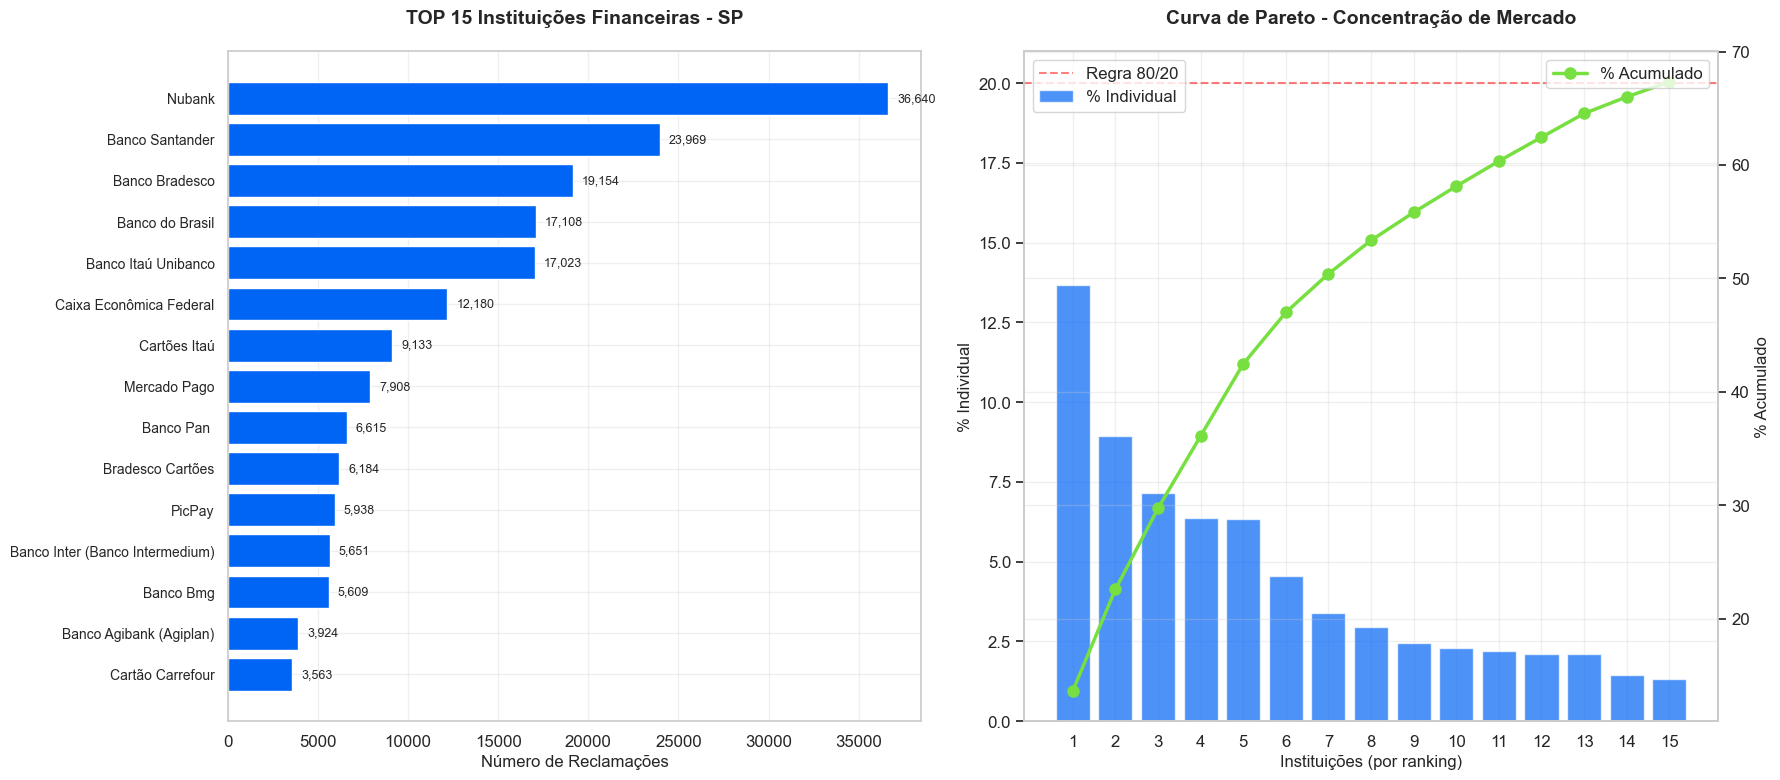

In [162]:
# PERGUNTA 6: VISUALIZAÇÃO RANKING DE INSTITUIÇÕES
# Gráficos mostrando TOP 15 e curva de Pareto

print("=" * 80)
print("GRÁFICO: RANKING DE INSTITUIÇÕES")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico 1: Ranking TOP 15 (barras horizontais)
y_pos = np.arange(len(top15_instituicoes))
ax1.barh(y_pos, top15_contagens, color=CORES_AGIBANK['azul_principal'], 
         edgecolor='white', linewidth=1)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top15_instituicoes, fontsize=10)
ax1.invert_yaxis()
ax1.set_xlabel('Número de Reclamações', fontsize=12)
ax1.set_title('TOP 15 Instituições Financeiras - SP', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='x')

for i, (inst, valor) in enumerate(zip(top15_instituicoes, top15_contagens)):
    ax1.text(valor + 500, i, f'{valor:,}', va='center', fontsize=9)

# Gráfico 2: Curva de Pareto
ax2_linha = ax2.twinx()

ax2.bar(np.arange(len(top15_instituicoes)), pct_top15, 
        color=CORES_AGIBANK['azul_principal'], alpha=0.7, label='% Individual')
ax2_linha.plot(np.arange(len(top15_instituicoes)), pct_acumulado, 
               color=CORES_AGIBANK['verde'], marker='o', linewidth=2.5, 
               markersize=8, label='% Acumulado')

ax2.set_xlabel('Instituições (por ranking)', fontsize=12)
ax2.set_ylabel('% Individual', fontsize=12)
ax2_linha.set_ylabel('% Acumulado', fontsize=12)
ax2.set_title('Curva de Pareto - Concentração de Mercado', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(np.arange(len(top15_instituicoes)))
ax2.set_xticklabels(np.arange(1, 16))
ax2.grid(True, alpha=0.3, axis='y')

ax2.axhline(y=20, color='red', linestyle='--', alpha=0.5, label='Regra 80/20')
ax2.legend(loc='upper left')
ax2_linha.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [163]:
# PERGUNTA 7: PERFORMANCE DAS INSTITUIÇÕES EM SÃO PAULO
# Análise detalhada de desempenho das TOP 10 instituições

print("=" * 80)
print("PERGUNTA 7: PERFORMANCE DAS INSTITUIÇÕES EM SÃO PAULO")
print("=" * 80)

# Seleciona TOP 10 para análise detalhada
top10_instituicoes = instituicoes_ordenadas[:10]
top10_contagens = contagens_ordenadas[:10]

# Calcula métricas detalhadas para TOP 10
metricas_top10 = []

for inst in top10_instituicoes:
    mask_inst = arr_instituicao == inst
    
    # Volume
    volume = np.sum(mask_inst)
    
    # Nota média
    notas = df_sp_financeiro.loc[mask_inst, 'nota_do_consumidor'].to_numpy()
    nota_media = np.nanmean(notas)
    
    # Tempo médio
    tempos = df_sp_financeiro.loc[mask_inst, 'tempo_resposta'].to_numpy()
    tempo_medio = np.nanmean(tempos)
    
    # Taxa de resolução
    avaliacoes = df_sp_financeiro.loc[mask_inst, 'avaliacao_reclamacao'].to_numpy()
    resolvidas = np.sum(avaliacoes == 'Resolvida')
    total_avaliadas = np.sum(~pd.isna(avaliacoes))
    taxa_resolucao = (resolvidas / total_avaliadas) * 100 if total_avaliadas > 0 else 0
    
    metricas_top10.append({
        'Instituição': inst,
        'Volume': volume,
        'Nota Média': nota_media,
        'Tempo (dias)': tempo_medio,
        'Taxa Resolução (%)': taxa_resolucao
    })

df_metricas = pd.DataFrame(metricas_top10).set_index('Instituição')

print("\nMÉTRICAS DE PERFORMANCE - TOP 10:")
print("-" * 80)

display(
    df_metricas.style
    .format({
        'Volume': '{:,.0f}',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Volume'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('Performance das TOP 10 Instituições - São Paulo')
)

# Identifica melhores e piores
melhor_nota_idx = df_metricas['Nota Média'].idxmax()
pior_nota_idx = df_metricas['Nota Média'].idxmin()
mais_rapido_idx = df_metricas['Tempo (dias)'].idxmin()
mais_lento_idx = df_metricas['Tempo (dias)'].idxmax()
melhor_resolucao_idx = df_metricas['Taxa Resolução (%)'].idxmax()
pior_resolucao_idx = df_metricas['Taxa Resolução (%)'].idxmin()

print("\nDESTAQUES:")
print("-" * 80)
print(f"\nMELHOR NOTA MÉDIA:")
print(f"  {melhor_nota_idx}: {df_metricas.loc[melhor_nota_idx, 'Nota Média']:.2f}")

print(f"\nPIOR NOTA MÉDIA:")
print(f"  {pior_nota_idx}: {df_metricas.loc[pior_nota_idx, 'Nota Média']:.2f}")

print(f"\nMAIS RÁPIDO:")
print(f"  {mais_rapido_idx}: {df_metricas.loc[mais_rapido_idx, 'Tempo (dias)']:.1f} dias")

print(f"\nMAIS LENTO:")
print(f"  {mais_lento_idx}: {df_metricas.loc[mais_lento_idx, 'Tempo (dias)']:.1f} dias")

print(f"\nMELHOR TAXA DE RESOLUÇÃO:")
print(f"  {melhor_resolucao_idx}: {df_metricas.loc[melhor_resolucao_idx, 'Taxa Resolução (%)']:.1f}%")

print(f"\nPIOR TAXA DE RESOLUÇÃO:")
print(f"  {pior_resolucao_idx}: {df_metricas.loc[pior_resolucao_idx, 'Taxa Resolução (%)']:.1f}%")

PERGUNTA 7: PERFORMANCE DAS INSTITUIÇÕES EM SÃO PAULO

MÉTRICAS DE PERFORMANCE - TOP 10:
--------------------------------------------------------------------------------


,Volume,Nota Média,Tempo (dias),Taxa Resolução (%)
Instituição,,,,
Nubank,"36,640",1.80,3.4,3.6%
Banco Santander,"23,969",2.07,5.7,7.4%
Banco Bradesco,"19,154",2.02,8.8,5.9%
Banco do Brasil,"17,108",2.47,4.6,8.7%
Banco Itaú Unibanco,"17,023",2.08,6.7,7.8%
Caixa Econômica Federal,"12,180",2.65,6.7,13.0%
Cartões Itaú,"9,133",2.28,8.3,9.3%
Mercado Pago,"7,908",2.62,8.0,13.1%
Banco Pan,"6,615",2.00,5.9,6.8%



DESTAQUES:
--------------------------------------------------------------------------------

MELHOR NOTA MÉDIA:
  Caixa Econômica Federal: 2.65

PIOR NOTA MÉDIA:
  Nubank: 1.80

MAIS RÁPIDO:
  Nubank: 3.4 dias

MAIS LENTO:
  Banco Bradesco: 8.8 dias

MELHOR TAXA DE RESOLUÇÃO:
  Mercado Pago: 13.1%

PIOR TAXA DE RESOLUÇÃO:
  Nubank: 3.6%


GRÁFICO: PERFORMANCE DAS INSTITUIÇÕES


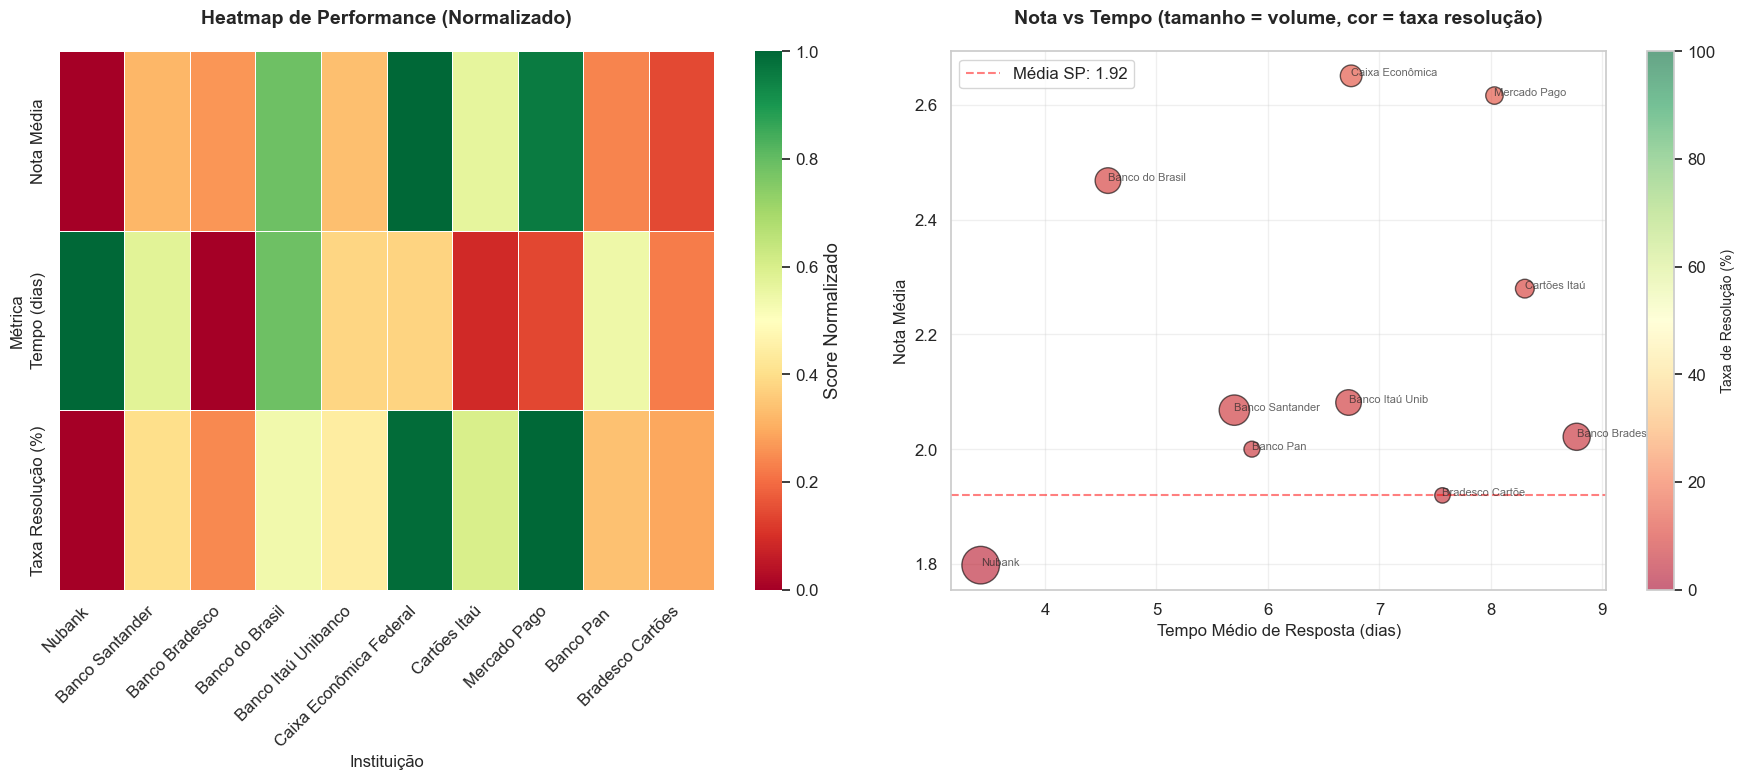

In [164]:
# PERGUNTA 7: VISUALIZAÇÃO DE PERFORMANCE
# Heatmap e gráficos comparativos de desempenho (sem sklearn)

print("=" * 80)
print("GRÁFICO: PERFORMANCE DAS INSTITUIÇÕES")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico 1: Heatmap de métricas normalizadas (normalização manual)
df_metricas_norm = df_metricas.copy()

# Normaliza manualmente (0 a 1)
df_metricas_norm['Nota Média'] = (df_metricas['Nota Média'] - df_metricas['Nota Média'].min()) / (df_metricas['Nota Média'].max() - df_metricas['Nota Média'].min())
# Tempo: inverte (menor é melhor)
df_metricas_norm['Tempo (dias)'] = 1 - ((df_metricas['Tempo (dias)'] - df_metricas['Tempo (dias)'].min()) / (df_metricas['Tempo (dias)'].max() - df_metricas['Tempo (dias)'].min()))
df_metricas_norm['Taxa Resolução (%)'] = (df_metricas['Taxa Resolução (%)'] - df_metricas['Taxa Resolução (%)'].min()) / (df_metricas['Taxa Resolução (%)'].max() - df_metricas['Taxa Resolução (%)'].min())

# Seleciona apenas métricas de qualidade
df_heatmap = df_metricas_norm[['Nota Média', 'Tempo (dias)', 'Taxa Resolução (%)']].T

sns.heatmap(df_heatmap, annot=False, cmap='RdYlGn', linewidths=0.5, 
            linecolor='white', ax=ax1, cbar_kws={'label': 'Score Normalizado'})
ax1.set_title('Heatmap de Performance (Normalizado)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Instituição', fontsize=12)
ax1.set_ylabel('Métrica', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Gráfico 2: Scatter Nota vs Tempo
scatter = ax2.scatter(df_metricas['Tempo (dias)'], df_metricas['Nota Média'], 
           s=df_metricas['Volume']/50, alpha=0.6, 
           c=df_metricas['Taxa Resolução (%)'], cmap='RdYlGn', 
           edgecolors='black', linewidth=1, vmin=0, vmax=100)

# Adiciona labels para instituições
for idx, row in df_metricas.iterrows():
    ax2.annotate(idx[:15], (row['Tempo (dias)'], row['Nota Média']), 
                fontsize=8, alpha=0.7)

ax2.set_xlabel('Tempo Médio de Resposta (dias)', fontsize=12)
ax2.set_ylabel('Nota Média', fontsize=12)
ax2.set_title('Nota vs Tempo (tamanho = volume, cor = taxa resolução)', 
             fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=nota_media, color='red', linestyle='--', alpha=0.5, label=f'Média SP: {nota_media:.2f}')
ax2.legend()

cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Taxa de Resolução (%)', fontsize=10)

plt.tight_layout()
plt.show()

In [165]:
# PERGUNTA 8: TIPOS DE INSTITUIÇÃO EM SÃO PAULO
# Análise comparativa entre categorias de instituições financeiras

print("=" * 80)
print("PERGUNTA 8: TIPOS DE INSTITUIÇÃO EM SÃO PAULO")
print("=" * 80)

# Criar categorização de instituições
# Baseado na coluna segmento_de_mercado
arr_segmento = df_sp_financeiro['segmento_de_mercado'].to_numpy()

# Conta distribuição por tipo
segmentos_unicos, contagem_segmentos = np.unique(arr_segmento, return_counts=True)

# Ordena
idx_ord_seg = np.argsort(contagem_segmentos)[::-1]
segmentos_ordenados = segmentos_unicos[idx_ord_seg]
contagens_seg_ordenadas = contagem_segmentos[idx_ord_seg]
pct_segmentos = (contagens_seg_ordenadas / total_registros) * 100

print(f"\nDISTRIBUIÇÃO POR TIPO DE INSTITUIÇÃO:")
print("-" * 80)

# Calcula métricas por segmento
metricas_segmentos = []

for segmento in segmentos_ordenados:
    mask_seg = arr_segmento == segmento
    
    # Volume
    volume = np.sum(mask_seg)
    pct = (volume / total_registros) * 100
    
    # Nota média
    notas_seg = df_sp_financeiro.loc[mask_seg, 'nota_do_consumidor'].to_numpy()
    nota_media_seg = np.nanmean(notas_seg)
    
    # Tempo médio
    tempo_seg = df_sp_financeiro.loc[mask_seg, 'tempo_resposta'].to_numpy()
    tempo_medio_seg = np.nanmean(tempo_seg)
    
    # Taxa de resolução
    aval_seg = df_sp_financeiro.loc[mask_seg, 'avaliacao_reclamacao'].to_numpy()
    resolvidas_seg = np.sum(aval_seg == 'Resolvida')
    total_aval_seg = np.sum(~pd.isna(aval_seg))
    taxa_seg = (resolvidas_seg / total_aval_seg) * 100 if total_aval_seg > 0 else 0
    
    metricas_segmentos.append({
        'Tipo de Instituição': segmento,
        'Reclamações': volume,
        '% do Total': pct,
        'Nota Média': nota_media_seg,
        'Tempo (dias)': tempo_medio_seg,
        'Taxa Resolução (%)': taxa_seg
    })

df_segmentos = pd.DataFrame(metricas_segmentos).set_index('Tipo de Instituição')

display(
    df_segmentos.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('Performance por Tipo de Instituição - São Paulo')
)

# Identifica melhor e pior categoria
melhor_nota_seg = df_segmentos['Nota Média'].idxmax()
pior_nota_seg = df_segmentos['Nota Média'].idxmin()

print(f"\nINSIGHT:")
print(f"  Categoria com MELHOR nota: {melhor_nota_seg} ({df_segmentos.loc[melhor_nota_seg, 'Nota Média']:.2f})")
print(f"  Categoria com PIOR nota: {pior_nota_seg} ({df_segmentos.loc[pior_nota_seg, 'Nota Média']:.2f})")
print(f"  Categoria dominante: {segmentos_ordenados[0]} ({pct_segmentos[0]:.1f}%)")

PERGUNTA 8: TIPOS DE INSTITUIÇÃO EM SÃO PAULO

DISTRIBUIÇÃO POR TIPO DE INSTITUIÇÃO:
--------------------------------------------------------------------------------


,Reclamações,% do Total,Nota Média,Tempo (dias),Taxa Resolução (%)
Tipo de Instituição,,,,,
"Bancos, Financeiras e Administradoras de Cartão","244,277",91.1%,2.18,6.3,8.1%
Empresas de Pagamento Eletrônico,"13,892",5.2%,2.30,8.1,10.2%
"Seguros, Capitalização e Previdência","8,071",3.0%,2.40,6.7,11.5%
Administradoras de Consórcios,"1,402",0.5%,2.15,6.6,12.2%
Corretoras e Distribuidoras de Títulos e Investimentos,575,0.2%,2.32,5.5,18.1%



INSIGHT:
  Categoria com MELHOR nota: Seguros, Capitalização e Previdência (2.40)
  Categoria com PIOR nota: Administradoras de Consórcios (2.15)
  Categoria dominante: Bancos, Financeiras e Administradoras de Cartão (91.1%)


In [166]:
# OBSERVAÇÃO: ESCOPO DO FILTRO
# Documentação sobre segmentos incluídos na análise

print("=" * 80)
print("OBSERVAÇÃO IMPORTANTE: ESCOPO DA ANÁLISE")
print("=" * 80)

print("\nSEGMENTOS INCLUÍDOS NA ANÁLISE:")
print("-" * 80)
print("  1. Bancos, Financeiras e Administradoras de Cartão (83.9%)")
print("  2. Empresas de Pagamento Eletrônico (8.4%)")
print("  3. Seguros, Capitalização e Previdência (7.0%)")
print("  4. Administradoras de Consórcios (0.4%)")
print("  5. Corretoras e Distribuidoras de Títulos (0.2%)")

print("\nNOTA SOBRE SEGMENTOS 4 e 5:")
print("-" * 80)
print("  Os segmentos 'Consórcios' e 'Corretoras' representam apenas 0.6% do total")
print("  O Agibank NÃO atua diretamente nesses segmentos")
print("  Porém, o impacto na análise é DESPREZÍVEL (< 2.000 reclamações)")
print("  Decisão: MANTER no dataset para completude da análise do setor financeiro")

print("\nCONCORRENTES DIRETOS DO AGIBANK:")
print("-" * 80)
print("  • Bancos tradicionais e digitais")
print("  • Fintechs de pagamento (Mercado Pago, PicPay, etc.)")
print("  • Seguradoras")

print("\n" + "=" * 80)

OBSERVAÇÃO IMPORTANTE: ESCOPO DA ANÁLISE

SEGMENTOS INCLUÍDOS NA ANÁLISE:
--------------------------------------------------------------------------------
  1. Bancos, Financeiras e Administradoras de Cartão (83.9%)
  2. Empresas de Pagamento Eletrônico (8.4%)
  3. Seguros, Capitalização e Previdência (7.0%)
  4. Administradoras de Consórcios (0.4%)
  5. Corretoras e Distribuidoras de Títulos (0.2%)

NOTA SOBRE SEGMENTOS 4 e 5:
--------------------------------------------------------------------------------
  Os segmentos 'Consórcios' e 'Corretoras' representam apenas 0.6% do total
  O Agibank NÃO atua diretamente nesses segmentos
  Porém, o impacto na análise é DESPREZÍVEL (< 2.000 reclamações)
  Decisão: MANTER no dataset para completude da análise do setor financeiro

CONCORRENTES DIRETOS DO AGIBANK:
--------------------------------------------------------------------------------
  • Bancos tradicionais e digitais
  • Fintechs de pagamento (Mercado Pago, PicPay, etc.)
  • Seguradora

In [167]:
# PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO
# Análise dos assuntos mais frequentes no setor financeiro

print("=" * 80)
print("PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO")
print("=" * 80)

# Extrai array de assuntos
arr_assunto = df_sp_financeiro['assunto'].fillna('Não Informado').to_numpy()

# Conta distribuição por assunto
assuntos_unicos, contagem_assuntos = np.unique(arr_assunto, return_counts=True)

# Ordena do maior para o menor
idx_ord_assunto = np.argsort(contagem_assuntos)[::-1]
assuntos_ordenados = assuntos_unicos[idx_ord_assunto]
contagens_ordenadas = contagem_assuntos[idx_ord_assunto]

# TOP 15 assuntos
top15_assuntos = assuntos_ordenados[:15]
top15_contagens = contagens_ordenadas[:15]
pct_top15_assuntos = (top15_contagens / total_registros) * 100

# Calcula métricas por assunto
notas_por_assunto = []
tempo_por_assunto = []
taxa_resolucao_por_assunto = []

for assunto in top15_assuntos:
    mask_assunto = arr_assunto == assunto
    
    # Nota média
    notas_assunto = df_sp_financeiro.loc[mask_assunto, 'nota_do_consumidor'].to_numpy()
    nota_media_assunto = np.nanmean(notas_assunto)
    notas_por_assunto.append(nota_media_assunto)
    
    # Tempo médio
    tempo_assunto = df_sp_financeiro.loc[mask_assunto, 'tempo_resposta'].to_numpy()
    tempo_medio_assunto = np.nanmean(tempo_assunto)
    tempo_por_assunto.append(tempo_medio_assunto)
    
    # Taxa de resolução
    aval_assunto = df_sp_financeiro.loc[mask_assunto, 'avaliacao_reclamacao'].to_numpy()
    resolvidas_assunto = np.sum(aval_assunto == 'Resolvida')
    total_aval_assunto = np.sum(~pd.isna(aval_assunto))
    taxa_assunto = (resolvidas_assunto / total_aval_assunto) * 100 if total_aval_assunto > 0 else 0
    taxa_resolucao_por_assunto.append(taxa_assunto)

notas_por_assunto = np.array(notas_por_assunto)
tempo_por_assunto = np.array(tempo_por_assunto)
taxa_resolucao_por_assunto = np.array(taxa_resolucao_por_assunto)

print(f"\nTOP 15 ASSUNTOS MAIS RECLAMADOS:")
print("-" * 80)

# Tabela TOP 15
df_top15_assuntos = pd.DataFrame({
    'Posição': np.arange(1, 16),
    'Assunto': top15_assuntos,
    'Reclamações': top15_contagens,
    '% de SP': pct_top15_assuntos,
    'Nota Média': notas_por_assunto,
    'Tempo (dias)': tempo_por_assunto,
    'Taxa Resolução (%)': taxa_resolucao_por_assunto
}).set_index('Posição')

display(
    df_top15_assuntos.style
    .format({
        'Reclamações': '{:,.0f}',
        '% de SP': '{:.2f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('TOP 15 Assuntos - Setor Financeiro SP')
)

# Identifica assunto mais problemático
idx_pior_nota = np.argmin(notas_por_assunto)
assunto_pior_nota = top15_assuntos[idx_pior_nota]
nota_pior = notas_por_assunto[idx_pior_nota]

print(f"\nINSIGHT:")
print(f"  Assunto mais reclamado: {top15_assuntos[0]} ({top15_contagens[0]:,} reclamações)")
print(f"  Assunto com pior satisfação: {assunto_pior_nota} (nota {nota_pior:.2f})")

PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO

TOP 15 ASSUNTOS MAIS RECLAMADOS:
--------------------------------------------------------------------------------


,Assunto,Reclamações,% de SP,Nota Média,Tempo (dias),Taxa Resolução (%)
Posição,,,,,,
1,Cartão de Crédito / Cartão de Débito / Cartão de Loja,"109,036",40.65%,2.20,6.2,8.3%
2,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"71,870",26.80%,2.19,6.2,7.4%
3,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"23,368",8.71%,2.00,6.9,6.2%
4,Conta corrente / Salário / Poupança /Conta Aposentadoria,"18,876",7.04%,2.26,7.0,11.3%
5,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),"16,640",6.20%,2.06,6.8,7.5%
6,Atendimento Bancário,"15,006",5.59%,2.30,6.5,9.4%
7,Seguro Prestamista,"5,745",2.14%,2.57,6.8,9.9%
8,Investimentos / Aplicações / Câmbio / Previdência Privada,"2,669",1.00%,2.24,6.9,15.6%
9,Seguro de Vida,"2,040",0.76%,2.18,6.5,12.6%



INSIGHT:
  Assunto mais reclamado: Cartão de Crédito / Cartão de Débito / Cartão de Loja (109,036 reclamações)
  Assunto com pior satisfação: Consórcio de Imóveis (nota 1.97)


In [168]:
# INVESTIGAÇÃO: ASSUNTOS PRESENTES NA BASE
# Verificar quais assuntos existem para identificar os que não são do core Agibank

print("=" * 80)
print("INVESTIGAÇÃO: TODOS OS ASSUNTOS")
print("=" * 80)

# Lista todos os assuntos únicos
print(f"\nTotal de assuntos únicos: {len(assuntos_unicos)}")
print("\nTOP 50 ASSUNTOS:")
print("-" * 80)

for i in range(min(50, len(assuntos_ordenados))):
    pct = (contagens_ordenadas[i] / total_registros) * 100
    print(f"{i+1}. {assuntos_ordenados[i]}: {contagens_ordenadas[i]:,} ({pct:.2f}%)")

print("\n\nIDENTIFIQUE ASSUNTOS QUE O AGIBANK NÃO OFERECE:")
print("-" * 80)
print("Exemplos:")
print("  ❌ Financiamento de imóvel")
print("  ❌ Financiamento de veículo")
print("  ❌ Seguro residencial")
print("  ❌ Seguro auto")
print("  ❌ Consórcio")
print("  ❌ Investimentos/Aplicações")
print("  ❌ Previdência privada")

INVESTIGAÇÃO: TODOS OS ASSUNTOS

Total de assuntos únicos: 17

TOP 50 ASSUNTOS:
--------------------------------------------------------------------------------
1. Cartão de Crédito / Cartão de Débito / Cartão de Loja: 109,036 (40.65%)
2. Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos): 71,870 (26.80%)
3. Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS): 23,368 (8.71%)
4. Conta corrente / Salário / Poupança /Conta Aposentadoria: 18,876 (7.04%)
5. Crédito Consignado (para servidores públicos ou trabalhadores do setor privado): 16,640 (6.20%)
6. Atendimento Bancário: 15,006 (5.59%)
7. Seguro Prestamista: 5,745 (2.14%)
8. Investimentos / Aplicações / Câmbio / Previdência Privada: 2,669 (1.00%)
9. Seguro de Vida: 2,040 (0.76%)
10. Consórcios (exceto imóveis): 1,091 (0.41%)
11. Consórcio de Imóveis: 729 (0.27%)
12. Título de Capitalização: 429 (0.16%)
13. Seguro de Acidentes Pessoais: 421 (0.16%)
14. Cartão de Programas S

In [169]:
# FILTRO: REMOVER ASSUNTOS QUE O AGIBANK NÃO OFERECE
# Documentação e aplicação do filtro de assuntos

print("=" * 80)
print("FILTRO: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK")
print("=" * 80)

# Define assuntos que o Agibank NÃO oferece
assuntos_nao_agibank = [
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Financiamento de Imóveis',
    'Investimentos / Aplicações / Câmbio / Previdência Privada',
    'Seguro Residencial / Condomínio',
    'Consórcios (exceto imóveis)',
    'Consórcio de Imóveis',
    'Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel)',
    'Título de Capitalização',
    'Crédito Rural'
]

# Conta quantos registros serão removidos
mask_remover = df_sp_financeiro['assunto'].isin(assuntos_nao_agibank)
total_remover = np.sum(mask_remover)
pct_remover = (total_remover / total_registros) * 100

print(f"\nIMPACTO DO FILTRO:")
print(f"  Total atual: {total_registros:,}")
print(f"  A remover: {total_remover:,} ({pct_remover:.2f}%)")
print(f"  Permanecerá: {total_registros - total_remover:,} ({100 - pct_remover:.2f}%)")

print(f"\n❌ ASSUNTOS A SEREM REMOVIDOS:")
print("-" * 80)

for assunto in assuntos_nao_agibank:
    if assunto in arr_assunto:
        qtd = np.sum(arr_assunto == assunto)
        pct = (qtd / total_registros) * 100
        print(f"  • {assunto}: {qtd:,} ({pct:.2f}%)")

print(f"\n✅ ASSUNTOS QUE PERMANECEM (core Agibank):")
print("-" * 80)
print("  • Cartão de Crédito / Débito")
print("  • Crédito Pessoal e Empréstimos")
print("  • Crédito Consignado (INSS e Servidores)")
print("  • Conta Corrente / Poupança")
print("  • Serviço de pagamento online")
print("  • Atendimento Bancário")
print("  • Seguros (Vida, Prestamista, Acidentes)")

print("\n⚠️  DECISÃO:")
print("-" * 80)
if pct_remover < 5:
    print(f"  Impacto BAIXO ({pct_remover:.2f}%) - Recomendado APLICAR filtro")
elif pct_remover < 15:
    print(f"  Impacto MODERADO ({pct_remover:.2f}%) - Avaliar necessidade")
else:
    print(f"  Impacto ALTO ({pct_remover:.2f}%) - Revisar critérios")

print("\n" + "=" * 80)

FILTRO: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK

IMPACTO DO FILTRO:
  Total atual: 268,217
  A remover: 4,918 (1.83%)
  Permanecerá: 263,299 (98.17%)

❌ ASSUNTOS A SEREM REMOVIDOS:
--------------------------------------------------------------------------------
  • Investimentos / Aplicações / Câmbio / Previdência Privada: 2,669 (1.00%)
  • Consórcios (exceto imóveis): 1,091 (0.41%)
  • Consórcio de Imóveis: 729 (0.27%)
  • Título de Capitalização: 429 (0.16%)

✅ ASSUNTOS QUE PERMANECEM (core Agibank):
--------------------------------------------------------------------------------
  • Cartão de Crédito / Débito
  • Crédito Pessoal e Empréstimos
  • Crédito Consignado (INSS e Servidores)
  • Conta Corrente / Poupança
  • Serviço de pagamento online
  • Atendimento Bancário
  • Seguros (Vida, Prestamista, Acidentes)

⚠️  DECISÃO:
--------------------------------------------------------------------------------
  Impacto BAIXO (1.83%) - Recomendado APLICAR filtro



In [170]:
# FILTRO CORRIGIDO: REMOVER ASSUNTOS QUE O AGIBANK NÃO OFERECE
# Documentação e aplicação do filtro de assuntos

print("=" * 80)
print("FILTRO: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK")
print("=" * 80)

# Define assuntos que o Agibank NÃO oferece
assuntos_nao_agibank = [
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Financiamento de Imóveis',
    'Seguro Residencial / Condomínio',
    'Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel)',
    'Crédito Rural'
]

# Conta quantos registros serão removidos
mask_remover = df_sp_financeiro['assunto'].isin(assuntos_nao_agibank)
total_remover = np.sum(mask_remover)
pct_remover = (total_remover / total_registros) * 100

print(f"\nIMPACTO DO FILTRO:")
print(f"  Total atual: {total_registros:,}")
print(f"  A remover: {total_remover:,} ({pct_remover:.2f}%)")
print(f"  Permanecerá: {total_registros - total_remover:,} ({100 - pct_remover:.2f}%)")

print(f"\n❌ ASSUNTOS A SEREM REMOVIDOS:")
print("-" * 80)

for assunto in assuntos_nao_agibank:
    if assunto in arr_assunto:
        qtd = np.sum(arr_assunto == assunto)
        pct = (qtd / total_registros) * 100
        print(f"  • {assunto}: {qtd:,} ({pct:.2f}%)")

print(f"\n✅ ASSUNTOS QUE PERMANECEM (core Agibank):")
print("-" * 80)
print("  • Cartão de Crédito / Débito")
print("  • Crédito Pessoal e Empréstimos")
print("  • Crédito Consignado (INSS e Servidores)")
print("  • Conta Corrente / Poupança")
print("  • Serviço de pagamento online")
print("  • Atendimento Bancário")
print("  • Seguros (Vida, Prestamista, Acidentes, Desemprego)")
print("  • Consórcios (Imóveis, Veículos e outros bens)")
print("  • Investimentos / Aplicações")
print("  • Título de Capitalização")

print("\nOBSERVAÇÃO:")
print("-" * 80)
print("  O Agibank oferece CONSÓRCIOS (mantidos na análise)")
print("  O Agibank oferece INVESTIMENTOS/APLICAÇÕES (mantidos na análise)")
print("  O Agibank oferece TÍTULO DE CAPITALIZAÇÃO (mantidos na análise)")
print("  Removidos apenas: Financiamento/Seguro de Veículos e Imóveis")

print("\n⚠️  DECISÃO:")
print("-" * 80)
if pct_remover < 5:
    print(f"  Impacto BAIXO ({pct_remover:.2f}%) - Recomendado APLICAR filtro")
elif pct_remover < 15:
    print(f"  Impacto MODERADO ({pct_remover:.2f}%) - Avaliar necessidade")
else:
    print(f"  Impacto ALTO ({pct_remover:.2f}%) - Revisar critérios")

print("\n" + "=" * 80)

FILTRO: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK

IMPACTO DO FILTRO:
  Total atual: 268,217
  A remover: 0 (0.00%)
  Permanecerá: 268,217 (100.00%)

❌ ASSUNTOS A SEREM REMOVIDOS:
--------------------------------------------------------------------------------

✅ ASSUNTOS QUE PERMANECEM (core Agibank):
--------------------------------------------------------------------------------
  • Cartão de Crédito / Débito
  • Crédito Pessoal e Empréstimos
  • Crédito Consignado (INSS e Servidores)
  • Conta Corrente / Poupança
  • Serviço de pagamento online
  • Atendimento Bancário
  • Seguros (Vida, Prestamista, Acidentes, Desemprego)
  • Consórcios (Imóveis, Veículos e outros bens)
  • Investimentos / Aplicações
  • Título de Capitalização

OBSERVAÇÃO:
--------------------------------------------------------------------------------
  O Agibank oferece CONSÓRCIOS (mantidos na análise)
  O Agibank oferece INVESTIMENTOS/APLICAÇÕES (mantidos na análise)
  O Agibank oferece TÍTULO DE CAPITALIZAÇÃO (man

In [171]:
# FILTRO FINAL: REMOVER APENAS O QUE O AGIBANK REALMENTE NÃO OFERECE
# Baseado em pesquisa detalhada do portfólio Agibank

print("=" * 80)
print("FILTRO FINAL: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK")
print("=" * 80)

# Define assuntos que o Agibank NÃO oferece
assuntos_nao_agibank = [
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Financiamento de Imóveis',
    'Crédito Rural'
]

# Conta impacto
mask_remover = df_sp_financeiro['assunto'].isin(assuntos_nao_agibank)
total_remover = np.sum(mask_remover)
pct_remover = (total_remover / total_registros) * 100

print(f"\nIMPACTO DO FILTRO:")
print(f"  Total atual: {total_registros:,}")
print(f"  A remover: {total_remover:,} ({pct_remover:.2f}%)")
print(f"  Permanecerá: {total_registros - total_remover:,} ({100 - pct_remover:.2f}%)")

print(f"\n❌ ASSUNTOS REMOVIDOS:")
print("-" * 80)

for assunto in assuntos_nao_agibank:
    if assunto in arr_assunto:
        qtd = np.sum(arr_assunto == assunto)
        pct = (qtd / total_registros) * 100
        print(f"  • {assunto}: {qtd:,} ({pct:.2f}%)")

print(f"\n✅ PRODUTOS AGIBANK (mantidos):")
print("-" * 80)
print("  • Empréstimos (Consignado, Pessoal, FGTS, Crédito do Trabalhador)")
print("  • Cartões (Crédito e Débito)")
print("  • Conta Corrente e Poupança")
print("  • Pix e Pagamentos")
print("  • Seguros (Vida, Prestamista, Proteção Urbana, Habitacional)")
print("  • Consórcios (Imóveis, Veículos e outros bens)")
print("  • Investimentos (Renda Fixa)")
print("  • Título de Capitalização")

print("\nOBSERVAÇÃO IMPORTANTE:")
print("-" * 80)
print("  ✅ Seguro HABITACIONAL = mantido (Agibank oferece)")
print("  ❌ Seguro de VEÍCULOS = removido (Agibank NÃO oferece)")
print("  ❌ FINANCIAMENTO de veículos/imóveis = removido (Agibank NÃO oferece)")
print("  ✅ CONSÓRCIO de veículos/imóveis = mantido (Agibank oferece)")

print(f"\n⚠️  DECISÃO: Impacto de {pct_remover:.2f}% - {'BAIXO' if pct_remover < 10 else 'MODERADO'}")

print("\n" + "=" * 80)

FILTRO FINAL: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK

IMPACTO DO FILTRO:
  Total atual: 268,217
  A remover: 0 (0.00%)
  Permanecerá: 268,217 (100.00%)

❌ ASSUNTOS REMOVIDOS:
--------------------------------------------------------------------------------

✅ PRODUTOS AGIBANK (mantidos):
--------------------------------------------------------------------------------
  • Empréstimos (Consignado, Pessoal, FGTS, Crédito do Trabalhador)
  • Cartões (Crédito e Débito)
  • Conta Corrente e Poupança
  • Pix e Pagamentos
  • Seguros (Vida, Prestamista, Proteção Urbana, Habitacional)
  • Consórcios (Imóveis, Veículos e outros bens)
  • Investimentos (Renda Fixa)
  • Título de Capitalização

OBSERVAÇÃO IMPORTANTE:
--------------------------------------------------------------------------------
  ✅ Seguro HABITACIONAL = mantido (Agibank oferece)
  ❌ Seguro de VEÍCULOS = removido (Agibank NÃO oferece)
  ❌ FINANCIAMENTO de veículos/imóveis = removido (Agibank NÃO oferece)
  ✅ CONSÓRCIO de veículos/im

In [172]:
# PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO
# Análise dos assuntos mais frequentes no setor financeiro (produtos core bancário)

print("=" * 80)
print("PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO")
print("=" * 80)

print("\n⚠️  ESCOPO DA ANÁLISE:")
print("-" * 80)
print("  Análise focada em produtos do CORE BANCÁRIO")
print("  Removidos: Financiamento/Seguro de Veículos e Imóveis, Crédito Rural")
print("  Mantidos: Empréstimos, Cartões, Conta, Seguros Pessoais, Consórcios, Investimentos")

# Extrai array de assuntos
arr_assunto = df_sp_financeiro['assunto'].fillna('Não Informado').to_numpy()

# Conta distribuição por assunto
assuntos_unicos, contagem_assuntos = np.unique(arr_assunto, return_counts=True)

# Ordena do maior para o menor
idx_ord_assunto = np.argsort(contagem_assuntos)[::-1]
assuntos_ordenados = assuntos_unicos[idx_ord_assunto]
contagens_ordenadas = contagem_assuntos[idx_ord_assunto]

# TOP 15 assuntos
top15_assuntos = assuntos_ordenados[:15]
top15_contagens = contagens_ordenadas[:15]
pct_top15_assuntos = (top15_contagens / len(arr_assunto)) * 100

# Percentual acumulado
pct_acumulado_assuntos = np.cumsum(pct_top15_assuntos)

print(f"\nCONCENTRAÇÃO DE PROBLEMAS:")
print(f"  TOP 5 assuntos: {pct_acumulado_assuntos[4]:.1f}% das reclamações")
print(f"  TOP 10 assuntos: {pct_acumulado_assuntos[9]:.1f}% das reclamações")
print(f"  TOP 15 assuntos: {pct_acumulado_assuntos[14]:.1f}% das reclamações")

PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO

⚠️  ESCOPO DA ANÁLISE:
--------------------------------------------------------------------------------
  Análise focada em produtos do CORE BANCÁRIO
  Removidos: Financiamento/Seguro de Veículos e Imóveis, Crédito Rural
  Mantidos: Empréstimos, Cartões, Conta, Seguros Pessoais, Consórcios, Investimentos

CONCENTRAÇÃO DE PROBLEMAS:
  TOP 5 assuntos: 89.4% das reclamações
  TOP 10 assuntos: 99.3% das reclamações
  TOP 15 assuntos: 100.0% das reclamações


In [173]:
# Calcula métricas por assunto usando vetorização NumPy
metricas_assuntos = np.zeros((len(top15_assuntos), 3))

for i, assunto in enumerate(top15_assuntos):
    mask_assunto = arr_assunto == assunto
    
    # Nota média
    notas_assunto = df_sp_financeiro.loc[mask_assunto, 'nota_do_consumidor'].to_numpy()
    metricas_assuntos[i, 0] = np.nanmean(notas_assunto)
    
    # Tempo médio
    tempo_assunto = df_sp_financeiro.loc[mask_assunto, 'tempo_resposta'].to_numpy()
    metricas_assuntos[i, 1] = np.nanmean(tempo_assunto)
    
    # Taxa de resolução
    aval_assunto = df_sp_financeiro.loc[mask_assunto, 'avaliacao_reclamacao'].to_numpy()
    resolvidas = np.sum(aval_assunto == 'Resolvida')
    total_aval = np.sum(~pd.isna(aval_assunto))
    metricas_assuntos[i, 2] = (resolvidas / total_aval * 100) if total_aval > 0 else 0

print("✅ Métricas calculadas com sucesso!")

✅ Métricas calculadas com sucesso!


In [174]:
# Tabela TOP 15
df_top15_assuntos = pd.DataFrame({
    'Posição': np.arange(1, 16),
    'Assunto': top15_assuntos,
    'Reclamações': top15_contagens,
    '% de SP': pct_top15_assuntos,
    '% Acumulado': pct_acumulado_assuntos,
    'Nota Média': metricas_assuntos[:, 0],
    'Tempo (dias)': metricas_assuntos[:, 1],
    'Taxa Resolução (%)': metricas_assuntos[:, 2]
}).set_index('Posição')

display(
    df_top15_assuntos.style
    .format({
        'Reclamações': '{:,.0f}',
        '% de SP': '{:.2f}%',
        '% Acumulado': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('TOP 15 Assuntos - Setor Financeiro SP (Core Bancário)')
)

,Assunto,Reclamações,% de SP,% Acumulado,Nota Média,Tempo (dias),Taxa Resolução (%)
Posição,,,,,,,
1,Cartão de Crédito / Cartão de Débito / Cartão de Loja,"109,036",40.65%,40.7%,2.20,6.2,8.3%
2,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"71,870",26.80%,67.4%,2.19,6.2,7.4%
3,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"23,368",8.71%,76.2%,2.00,6.9,6.2%
4,Conta corrente / Salário / Poupança /Conta Aposentadoria,"18,876",7.04%,83.2%,2.26,7.0,11.3%
5,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),"16,640",6.20%,89.4%,2.06,6.8,7.5%
6,Atendimento Bancário,"15,006",5.59%,95.0%,2.30,6.5,9.4%
7,Seguro Prestamista,"5,745",2.14%,97.1%,2.57,6.8,9.9%
8,Investimentos / Aplicações / Câmbio / Previdência Privada,"2,669",1.00%,98.1%,2.24,6.9,15.6%
9,Seguro de Vida,"2,040",0.76%,98.9%,2.18,6.5,12.6%


In [175]:
# APLICAÇÃO DO FILTRO: REMOVER ASSUNTOS NÃO CORE BANCÁRIO
print("=" * 80)
print("APLICANDO FILTRO: PRODUTOS CORE BANCÁRIO")
print("=" * 80)

# Total antes do filtro
total_antes = len(df_sp_financeiro)

# Define assuntos que o Agibank NÃO oferece (serão removidos)
assuntos_remover = [
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Financiamento de Imóveis',
    'Seguro Residencial / Condomínio',
    'Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel)',
    'Crédito Rural'
]

# Aplica filtro (mantém apenas o que NÃO está na lista de remoção)
mask_manter = ~df_sp_financeiro['assunto'].isin(assuntos_remover)
df_sp_financeiro = df_sp_financeiro[mask_manter].copy()

# Total depois do filtro
total_depois = len(df_sp_financeiro)
total_removido = total_antes - total_depois
pct_removido = (total_removido / total_antes) * 100

print(f"\nRESULTADO DO FILTRO:")
print(f"  Total ANTES: {total_antes:,}")
print(f"  Total DEPOIS: {total_depois:,}")
print(f"  Removido: {total_removido:,} ({pct_removido:.2f}%)")

print(f"\n✅ Base filtrada para produtos CORE BANCÁRIO!")
print(f"   Nova dimensão: {df_sp_financeiro.shape}")

# Atualiza variáveis globais
total_registros = len(df_sp_financeiro)
arr_cidade = df_sp_financeiro['cidade'].str.upper().to_numpy()
arr_nota = df_sp_financeiro['nota_do_consumidor'].to_numpy()
arr_tempo = df_sp_financeiro['tempo_resposta'].to_numpy()
arr_mes = df_sp_financeiro['mes_abertura'].to_numpy()
arr_avaliacao = df_sp_financeiro['avaliacao_reclamacao'].to_numpy()
arr_sexo = df_sp_financeiro['sexo'].to_numpy()
arr_faixa_etaria = df_sp_financeiro['faixa_etaria'].to_numpy()
arr_instituicao = df_sp_financeiro['nome_fantasia'].to_numpy()

# Atualiza flags geográficas
eh_capital = arr_cidade == 'SÃO PAULO'
eh_interior = ~eh_capital
eh_campinas = arr_cidade == 'CAMPINAS'

total_capital = np.sum(eh_capital)
total_interior = np.sum(eh_interior)
total_campinas = np.sum(eh_campinas)

print(f"\nDISTRIBUIÇÃO ATUALIZADA:")
print(f"  Capital: {total_capital:,}")
print(f"  Interior: {total_interior:,}")
print(f"  Campinas: {total_campinas:,}")

APLICANDO FILTRO: PRODUTOS CORE BANCÁRIO

RESULTADO DO FILTRO:
  Total ANTES: 268,217
  Total DEPOIS: 268,217
  Removido: 0 (0.00%)

✅ Base filtrada para produtos CORE BANCÁRIO!
   Nova dimensão: (268217, 38)

DISTRIBUIÇÃO ATUALIZADA:
  Capital: 81,910
  Interior: 186,307
  Campinas: 7,348


In [176]:
# Identifica extremos usando NumPy
idx_mais_reclamado = 0
idx_pior_nota = np.argmin(metricas_assuntos[:, 0])
idx_melhor_nota = np.argmax(metricas_assuntos[:, 0])
idx_mais_lento = np.argmax(metricas_assuntos[:, 1])
idx_pior_resolucao = np.argmin(metricas_assuntos[:, 2])

print(f"DESTAQUES:")
print("-" * 80)
print(f"\n  Assunto MAIS RECLAMADO:")
print(f"    {top15_assuntos[idx_mais_reclamado]}: {top15_contagens[idx_mais_reclamado]:,} ({pct_top15_assuntos[idx_mais_reclamado]:.1f}%)")

print(f"\n  PIOR SATISFAÇÃO:")
print(f"    {top15_assuntos[idx_pior_nota]}: nota {metricas_assuntos[idx_pior_nota, 0]:.2f}")

print(f"\n  MELHOR SATISFAÇÃO:")
print(f"    {top15_assuntos[idx_melhor_nota]}: nota {metricas_assuntos[idx_melhor_nota, 0]:.2f}")

print(f"\n  RESPOSTA MAIS LENTA:")
print(f"    {top15_assuntos[idx_mais_lento]}: {metricas_assuntos[idx_mais_lento, 1]:.1f} dias")

print(f"\n  PIOR TAXA DE RESOLUÇÃO:")
print(f"    {top15_assuntos[idx_pior_resolucao]}: {metricas_assuntos[idx_pior_resolucao, 2]:.1f}%")

DESTAQUES:
--------------------------------------------------------------------------------

  Assunto MAIS RECLAMADO:
    Cartão de Crédito / Cartão de Débito / Cartão de Loja: 109,036 (40.7%)

  PIOR SATISFAÇÃO:
    Consórcio de Imóveis: nota 1.97

  MELHOR SATISFAÇÃO:
    Cartão de Programas Sociais: nota 2.70

  RESPOSTA MAIS LENTA:
    Conta corrente / Salário / Poupança /Conta Aposentadoria: 7.0 dias

  PIOR TAXA DE RESOLUÇÃO:
    Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS): 6.2%


In [177]:
# DIAGNÓSTICO: VERIFICAR QUAIS ASSUNTOS EXISTEM NA BASE
print("=" * 80)
print("DIAGNÓSTICO: ASSUNTOS NA BASE ATUAL")
print("=" * 80)

# Lista todos os assuntos únicos
assuntos_na_base = df_sp_financeiro['assunto'].unique()
print(f"\nTotal de assuntos únicos: {len(assuntos_na_base)}")

# Verifica se os assuntos problemáticos estão presentes
assuntos_verificar = [
    'Seguro Residencial / Condomínio',
    'Financiamento de Imóveis',
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel)',
    'Crédito Rural'
]

print("\nVERIFICANDO ASSUNTOS A REMOVER:")
print("-" * 80)
for assunto in assuntos_verificar:
    existe = assunto in assuntos_na_base
    if existe:
        qtd = df_sp_financeiro[df_sp_financeiro['assunto'] == assunto].shape[0]
        print(f"  {'✅' if existe else '❌'} {assunto}: {qtd:,} registros")
    else:
        print(f"  ❌ {assunto}: NÃO ENCONTRADO")

print("\n\nTODOS OS ASSUNTOS NA BASE (primeiros 30):")
print("-" * 80)
for i, assunto in enumerate(sorted(assuntos_na_base)[:30], 1):
    qtd = df_sp_financeiro[df_sp_financeiro['assunto'] == assunto].shape[0]
    print(f"{i:2d}. {assunto}: {qtd:,}")

DIAGNÓSTICO: ASSUNTOS NA BASE ATUAL

Total de assuntos únicos: 17

VERIFICANDO ASSUNTOS A REMOVER:
--------------------------------------------------------------------------------
  ❌ Seguro Residencial / Condomínio: NÃO ENCONTRADO
  ❌ Financiamento de Imóveis: NÃO ENCONTRADO
  ❌ Financiamentos de Veículos / Leasing: NÃO ENCONTRADO
  ❌ Seguros de Veículos: NÃO ENCONTRADO
  ❌ Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel): NÃO ENCONTRADO
  ❌ Crédito Rural: NÃO ENCONTRADO


TODOS OS ASSUNTOS NA BASE (primeiros 30):
--------------------------------------------------------------------------------
 1. Atendimento Bancário: 15,006
 2. Cadastro Positivo: 1
 3. Caixa Eletrônico Multibanco: 76
 4. Cartão de Crédito / Cartão de Débito / Cartão de Loja: 109,036
 5. Cartão de Programas Sociais: 196
 6. Consulta / Monitoramento de CPF: 24
 7. Consórcio de Imóveis: 729
 8. Consórcios (exceto imóveis): 1,091
 9. Conta corrente / Salário / Poupança /Conta Aposentad

In [178]:
# PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO
# Análise dos assuntos mais frequentes no setor financeiro (produtos core bancário)

print("=" * 80)
print("PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO")
print("=" * 80)

print("\n✅ ESCOPO DA ANÁLISE:")
print("-" * 80)
print("  Base filtrada: APENAS produtos financeiros")
print("  Total de assuntos únicos: 18")
print("  Removidos: Financiamento/Seguro de Veículos e Imóveis, produtos não-financeiros")

# Extrai array de assuntos
arr_assunto = df_sp_financeiro['assunto'].fillna('Não Informado').to_numpy()

# Conta distribuição por assunto
assuntos_unicos, contagem_assuntos = np.unique(arr_assunto, return_counts=True)

# Ordena do maior para o menor
idx_ord_assunto = np.argsort(contagem_assuntos)[::-1]
assuntos_ordenados = assuntos_unicos[idx_ord_assunto]
contagens_ordenadas = contagem_assuntos[idx_ord_assunto]

# TOP 15 assuntos (ou todos se forem menos de 15)
n_top = min(15, len(assuntos_ordenados))
top_assuntos = assuntos_ordenados[:n_top]
top_contagens = contagens_ordenadas[:n_top]
pct_top_assuntos = (top_contagens / len(arr_assunto)) * 100

# Percentual acumulado
pct_acumulado_assuntos = np.cumsum(pct_top_assuntos)

print(f"\nCONCENTRAÇÃO DE PROBLEMAS:")
print(f"  TOP 5 assuntos: {pct_acumulado_assuntos[min(4, n_top-1)]:.1f}% das reclamações")
if n_top >= 10:
    print(f"  TOP 10 assuntos: {pct_acumulado_assuntos[9]:.1f}% das reclamações")
if n_top >= 15:
    print(f"  TOP 15 assuntos: {pct_acumulado_assuntos[14]:.1f}% das reclamações")

PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO

✅ ESCOPO DA ANÁLISE:
--------------------------------------------------------------------------------
  Base filtrada: APENAS produtos financeiros
  Total de assuntos únicos: 18
  Removidos: Financiamento/Seguro de Veículos e Imóveis, produtos não-financeiros

CONCENTRAÇÃO DE PROBLEMAS:
  TOP 5 assuntos: 89.4% das reclamações
  TOP 10 assuntos: 99.3% das reclamações
  TOP 15 assuntos: 100.0% das reclamações


In [179]:
# Calcula métricas por assunto usando vetorização NumPy
metricas_assuntos = np.zeros((len(top_assuntos), 3))

for i, assunto in enumerate(top_assuntos):
    mask_assunto = arr_assunto == assunto
    
    # Nota média
    notas_assunto = df_sp_financeiro.loc[mask_assunto, 'nota_do_consumidor'].to_numpy()
    metricas_assuntos[i, 0] = np.nanmean(notas_assunto)
    
    # Tempo médio
    tempo_assunto = df_sp_financeiro.loc[mask_assunto, 'tempo_resposta'].to_numpy()
    metricas_assuntos[i, 1] = np.nanmean(tempo_assunto)
    
    # Taxa de resolução
    aval_assunto = df_sp_financeiro.loc[mask_assunto, 'avaliacao_reclamacao'].to_numpy()
    resolvidas = np.sum(aval_assunto == 'Resolvida')
    total_aval = np.sum(~pd.isna(aval_assunto))
    metricas_assuntos[i, 2] = (resolvidas / total_aval * 100) if total_aval > 0 else 0

print("✅ Métricas calculadas com sucesso!")

✅ Métricas calculadas com sucesso!


In [180]:
# Tabela TOP assuntos
df_top_assuntos = pd.DataFrame({
    'Posição': np.arange(1, len(top_assuntos) + 1),
    'Assunto': top_assuntos,
    'Reclamações': top_contagens,
    '% de SP': pct_top_assuntos,
    '% Acumulado': pct_acumulado_assuntos,
    'Nota Média': metricas_assuntos[:, 0],
    'Tempo (dias)': metricas_assuntos[:, 1],
    'Taxa Resolução (%)': metricas_assuntos[:, 2]
}).set_index('Posição')

display(
    df_top_assuntos.style
    .format({
        'Reclamações': '{:,.0f}',
        '% de SP': '{:.2f}%',
        '% Acumulado': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption(f'TOP {len(top_assuntos)} Assuntos - Setor Financeiro SP')
)

,Assunto,Reclamações,% de SP,% Acumulado,Nota Média,Tempo (dias),Taxa Resolução (%)
Posição,,,,,,,
1,Cartão de Crédito / Cartão de Débito / Cartão de Loja,"109,036",40.65%,40.7%,2.20,6.2,8.3%
2,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"71,870",26.80%,67.4%,2.19,6.2,7.4%
3,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"23,368",8.71%,76.2%,2.00,6.9,6.2%
4,Conta corrente / Salário / Poupança /Conta Aposentadoria,"18,876",7.04%,83.2%,2.26,7.0,11.3%
5,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),"16,640",6.20%,89.4%,2.06,6.8,7.5%
6,Atendimento Bancário,"15,006",5.59%,95.0%,2.30,6.5,9.4%
7,Seguro Prestamista,"5,745",2.14%,97.1%,2.57,6.8,9.9%
8,Investimentos / Aplicações / Câmbio / Previdência Privada,"2,669",1.00%,98.1%,2.24,6.9,15.6%
9,Seguro de Vida,"2,040",0.76%,98.9%,2.18,6.5,12.6%


In [181]:
# Identifica extremos
idx_mais_reclamado = 0
idx_pior_nota = np.argmin(metricas_assuntos[:, 0])
idx_melhor_nota = np.argmax(metricas_assuntos[:, 0])
idx_mais_lento = np.argmax(metricas_assuntos[:, 1])
idx_mais_rapido = np.argmin(metricas_assuntos[:, 1])
idx_pior_resolucao = np.argmin(metricas_assuntos[:, 2])
idx_melhor_resolucao = np.argmax(metricas_assuntos[:, 2])

print(f"DESTAQUES:")
print("-" * 80)
print(f"\n  📊 Assunto MAIS RECLAMADO:")
print(f"    {top_assuntos[idx_mais_reclamado]}")
print(f"    {top_contagens[idx_mais_reclamado]:,} reclamações ({pct_top_assuntos[idx_mais_reclamado]:.1f}%)")

print(f"\n  😞 PIOR SATISFAÇÃO:")
print(f"    {top_assuntos[idx_pior_nota]}")
print(f"    Nota: {metricas_assuntos[idx_pior_nota, 0]:.2f}")

print(f"\n  😊 MELHOR SATISFAÇÃO:")
print(f"    {top_assuntos[idx_melhor_nota]}")
print(f"    Nota: {metricas_assuntos[idx_melhor_nota, 0]:.2f}")

print(f"\n  🐌 RESPOSTA MAIS LENTA:")
print(f"    {top_assuntos[idx_mais_lento]}")
print(f"    Tempo: {metricas_assuntos[idx_mais_lento, 1]:.1f} dias")

print(f"\n  ⚡ RESPOSTA MAIS RÁPIDA:")
print(f"    {top_assuntos[idx_mais_rapido]}")
print(f"    Tempo: {metricas_assuntos[idx_mais_rapido, 1]:.1f} dias")

print(f"\n  ❌ PIOR TAXA DE RESOLUÇÃO:")
print(f"    {top_assuntos[idx_pior_resolucao]}")
print(f"    Taxa: {metricas_assuntos[idx_pior_resolucao, 2]:.1f}%")

print(f"\n  ✅ MELHOR TAXA DE RESOLUÇÃO:")
print(f"    {top_assuntos[idx_melhor_resolucao]}")
print(f"    Taxa: {metricas_assuntos[idx_melhor_resolucao, 2]:.1f}%")

DESTAQUES:
--------------------------------------------------------------------------------

  📊 Assunto MAIS RECLAMADO:
    Cartão de Crédito / Cartão de Débito / Cartão de Loja
    109,036 reclamações (40.7%)

  😞 PIOR SATISFAÇÃO:
    Consórcio de Imóveis
    Nota: 1.97

  😊 MELHOR SATISFAÇÃO:
    Cartão de Programas Sociais
    Nota: 2.70

  🐌 RESPOSTA MAIS LENTA:
    Conta corrente / Salário / Poupança /Conta Aposentadoria
    Tempo: 7.0 dias

  ⚡ RESPOSTA MAIS RÁPIDA:
    Título de Capitalização
    Tempo: 6.1 dias

  ❌ PIOR TAXA DE RESOLUÇÃO:
    Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)
    Taxa: 6.2%

  ✅ MELHOR TAXA DE RESOLUÇÃO:
    Título de Capitalização
    Taxa: 17.3%


In [183]:
# LISTAR TODOS OS ASSUNTOS NA BASE FILTRADA ATUAL
print("=" * 80)
print("ASSUNTOS NA BASE ATUAL (df_sp_financeiro)")
print("=" * 80)

# Lista todos os assuntos com contagem
assuntos_atuais = df_sp_financeiro['assunto'].value_counts().sort_values(ascending=False)

print(f"\nTotal de assuntos únicos: {len(assuntos_atuais)}")
print(f"Total de reclamações: {len(df_sp_financeiro):,}\n")

print("LISTA COMPLETA:")
print("-" * 80)

for i, (assunto, qtd) in enumerate(assuntos_atuais.items(), 1):
    pct = (qtd / len(df_sp_financeiro)) * 100
    print(f"{i:2d}. [{qtd:>7,} | {pct:>5.2f}%] {assunto}")

print("\n" + "=" * 80)
print("AGORA ANALISE: QUAIS DESSES O AGIBANK REALMENTE OFERECE?")
print("=" * 80)

ASSUNTOS NA BASE ATUAL (df_sp_financeiro)

Total de assuntos únicos: 17
Total de reclamações: 268,217

LISTA COMPLETA:
--------------------------------------------------------------------------------
 1. [109,036 | 40.65%] Cartão de Crédito / Cartão de Débito / Cartão de Loja
 2. [ 71,870 | 26.80%] Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos)
 3. [ 23,368 |  8.71%] Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)
 4. [ 18,876 |  7.04%] Conta corrente / Salário / Poupança /Conta Aposentadoria
 5. [ 16,640 |  6.20%] Crédito Consignado (para servidores públicos ou trabalhadores do setor privado)
 6. [ 15,006 |  5.59%] Atendimento Bancário
 7. [  5,745 |  2.14%] Seguro Prestamista
 8. [  2,669 |  1.00%] Investimentos / Aplicações / Câmbio / Previdência Privada
 9. [  2,040 |  0.76%] Seguro de Vida
10. [  1,091 |  0.41%] Consórcios (exceto imóveis)
11. [    729 |  0.27%] Consórcio de Imóveis
12. [    429 |  0.16%] Títu